In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

In [2]:
df = pd.read_csv(r"C:\Users\ankam\OneDrive\Desktop\Research\gene_data_continuous.csv")
df.head()

Gene 1     Gene 2    Gene 3     Gene 4    Gene 5  Phenotype
0  22.931208   4.615516  0.858693   5.493363  2.502145        1.6
1   0.465344  33.971256  0.048855  22.692144  8.697771        0.8
2  15.552960  41.210844  0.494156  14.232048  2.370049        1.5
3   0.654853   0.223751  0.849338  39.604212  0.351109        1.2
4  14.463038  13.995482  0.100210  22.064560  4.989752        1.0

In [3]:
df.isnull().sum()

Gene 1       0
Gene 2       0
Gene 3       0
Gene 4       0
Gene 5       0
Phenotype    0
dtype: int64

In [4]:
x = df.iloc[:, 0:5]
y = df.iloc[:, 5:6]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(x, y)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)

# Get SHAP values for all instances
shap_values = explainer.shap_values(x)

C:\Users\ankam\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [13]:
from sklearn.metrics import mean_squared_error
r2_score = model.score(x,y)
print(r2_score)

0.9315769485868334


In [15]:
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print (mse)
print (mae)
print (r2_score)

0.011160399999999966
0.08273333333333323
0.9180787863958897


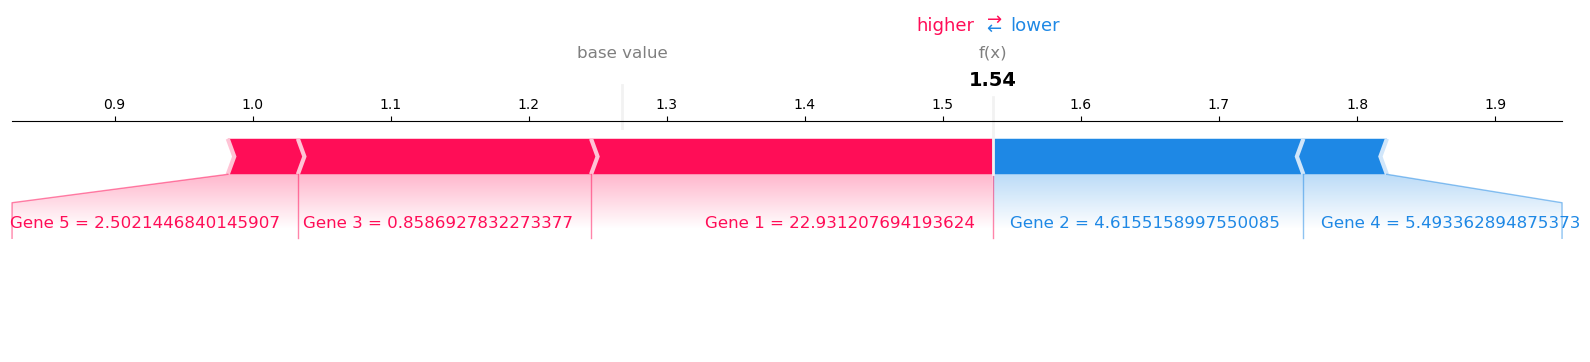

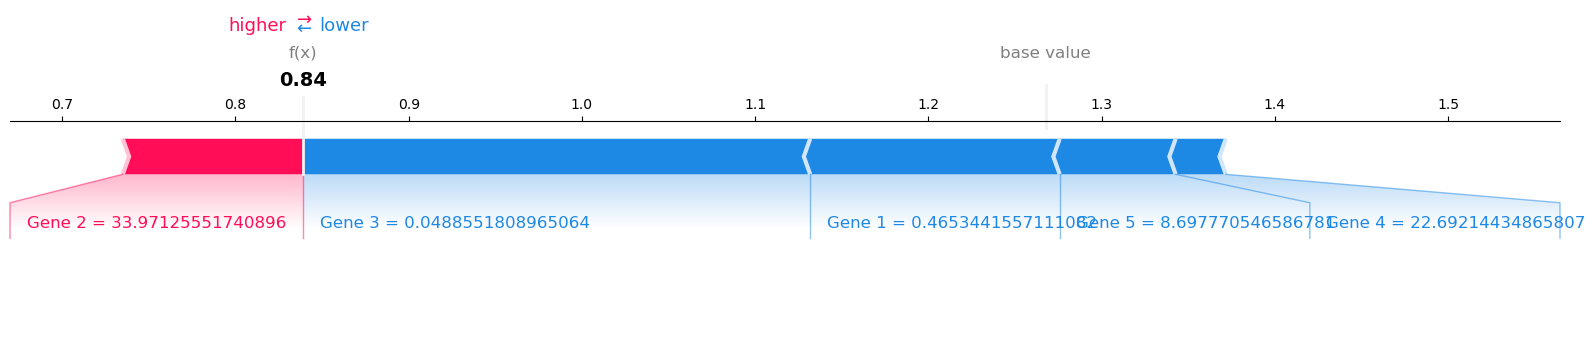

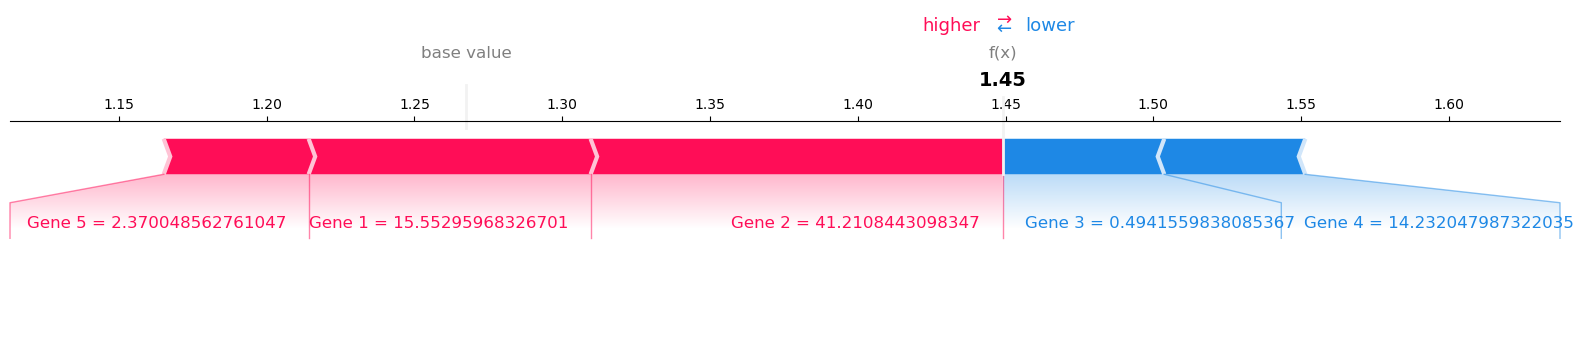

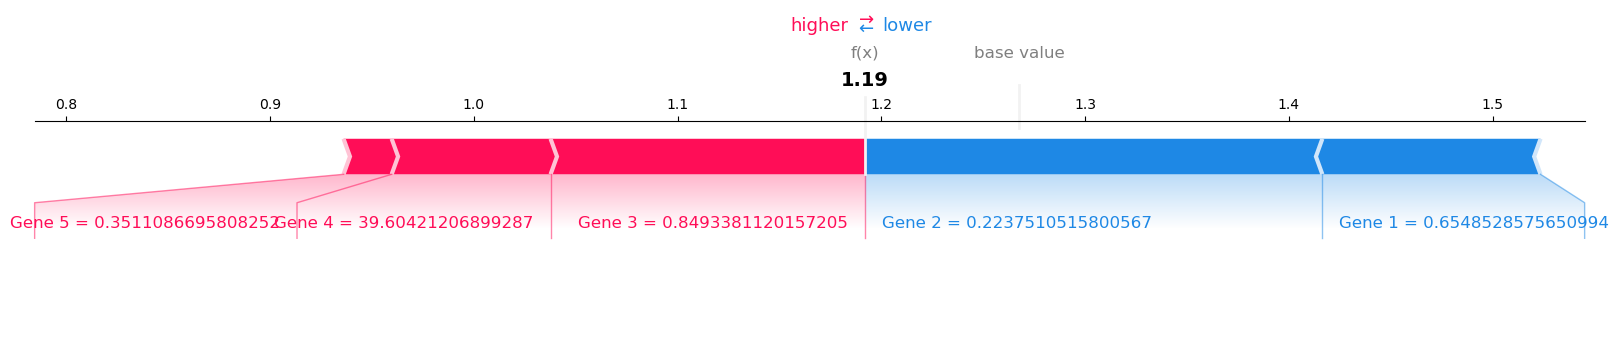

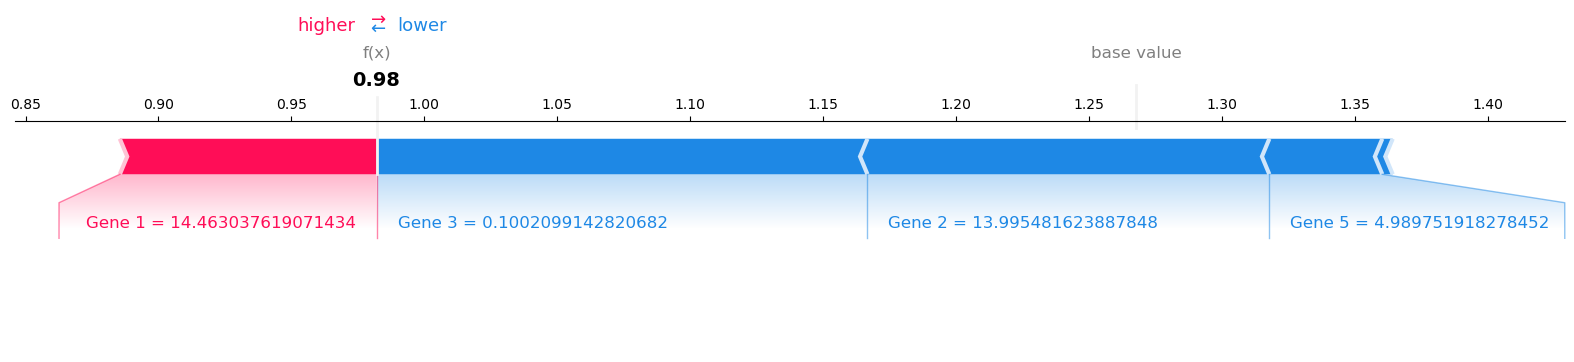

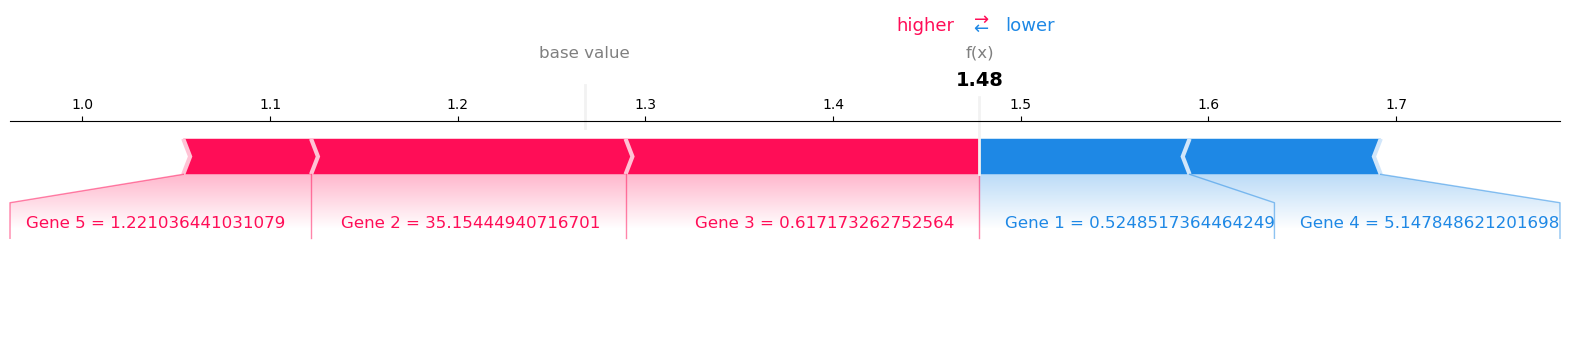

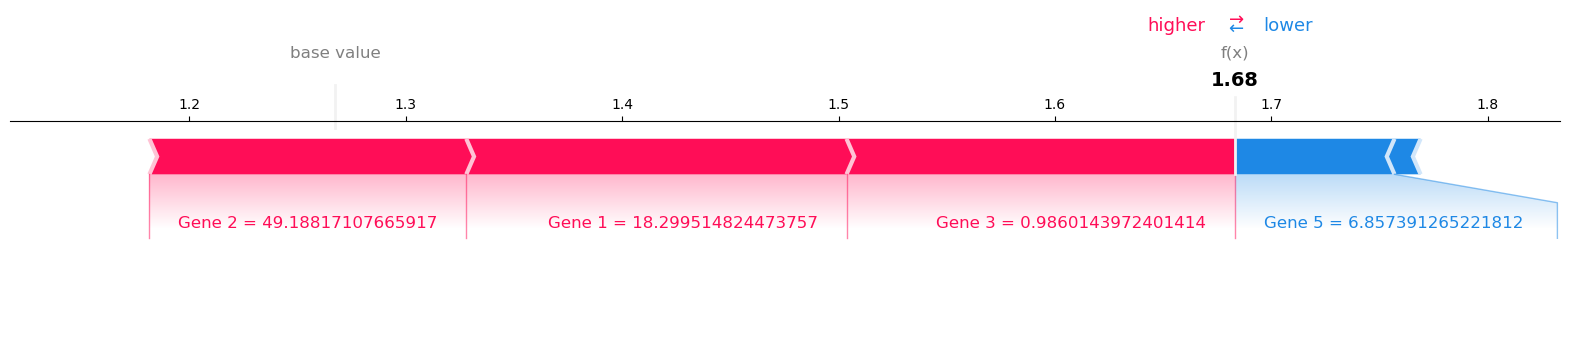

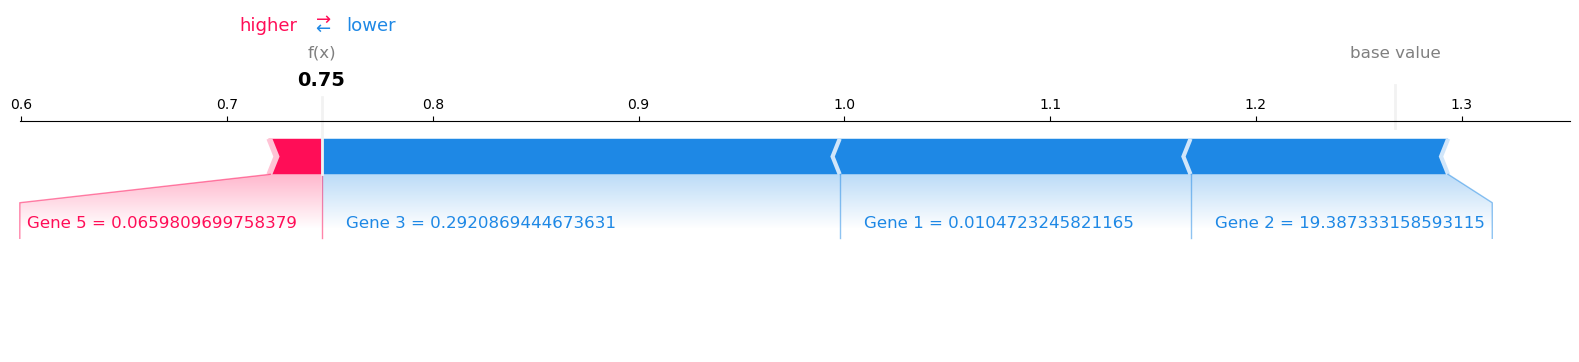

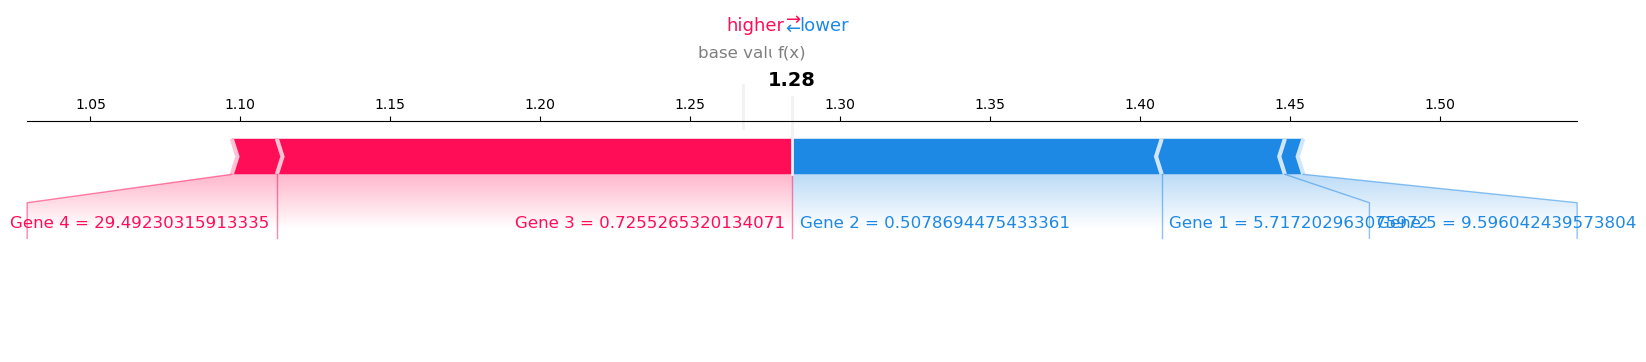

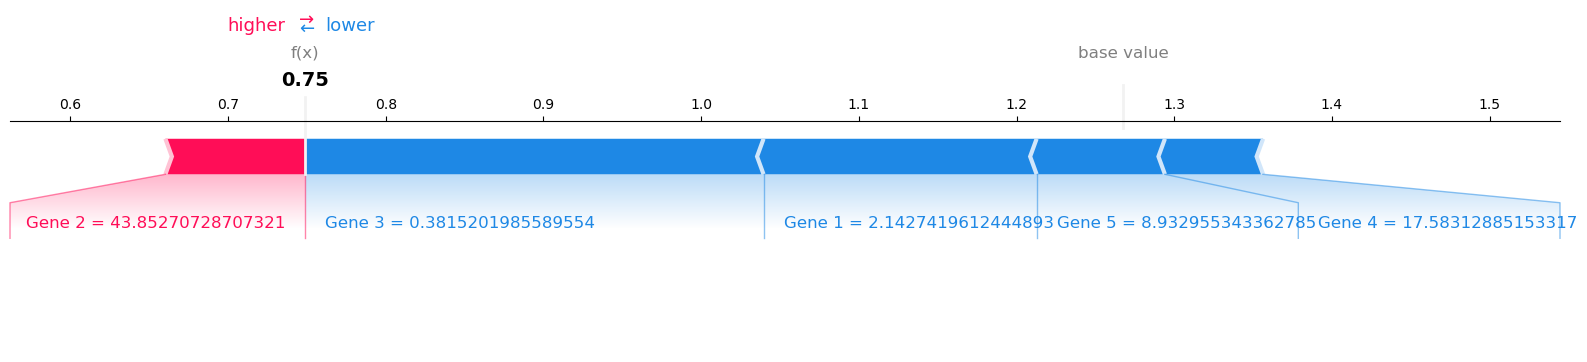

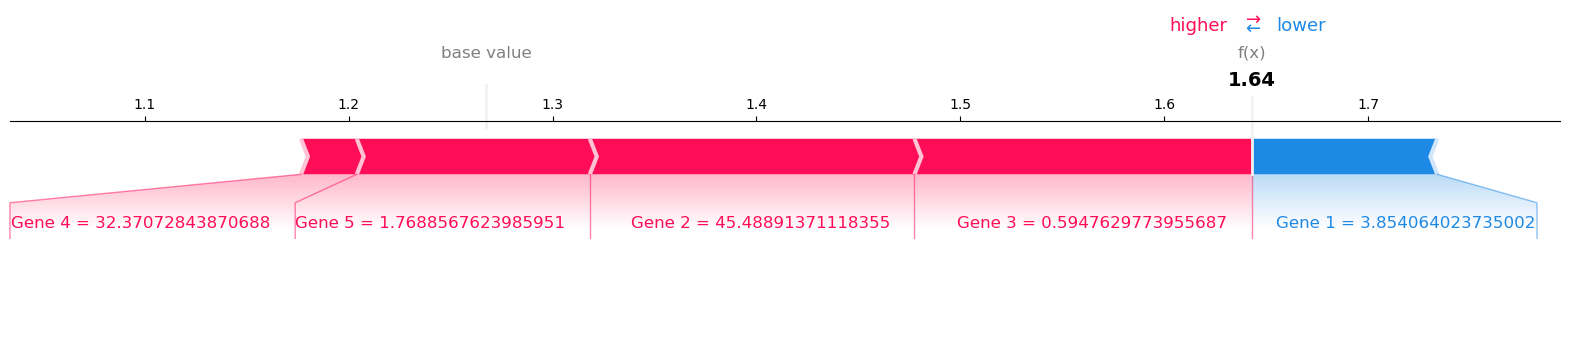

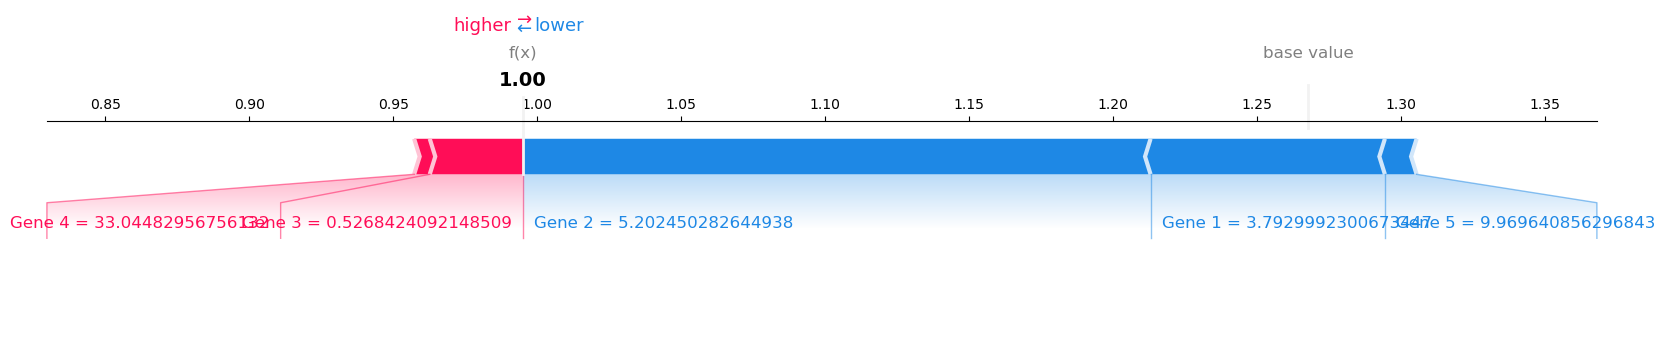

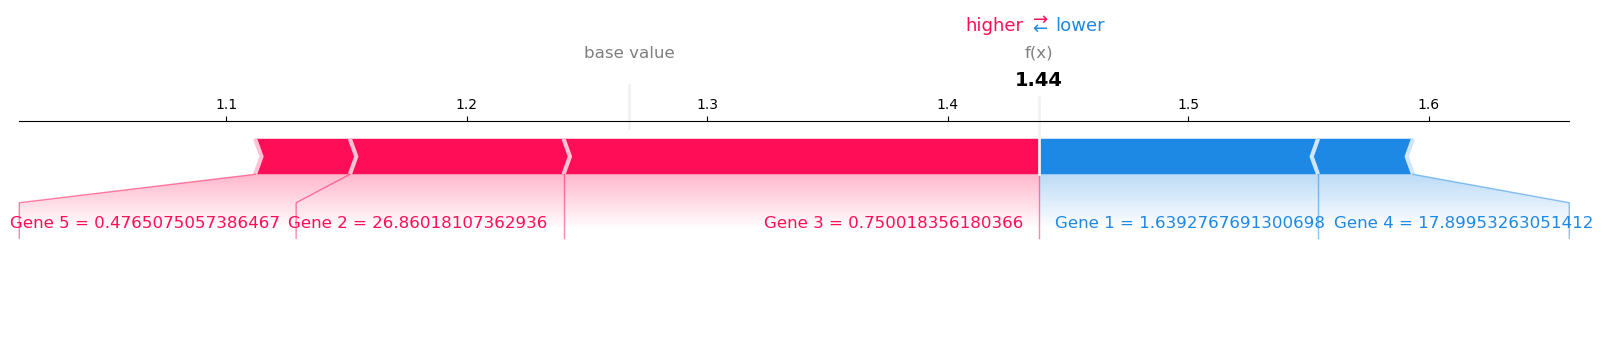

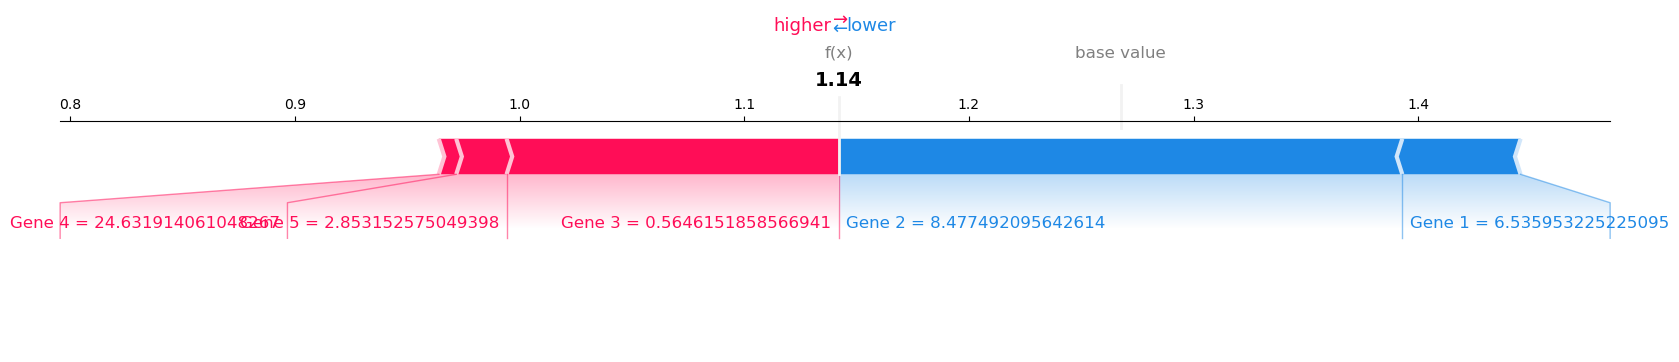

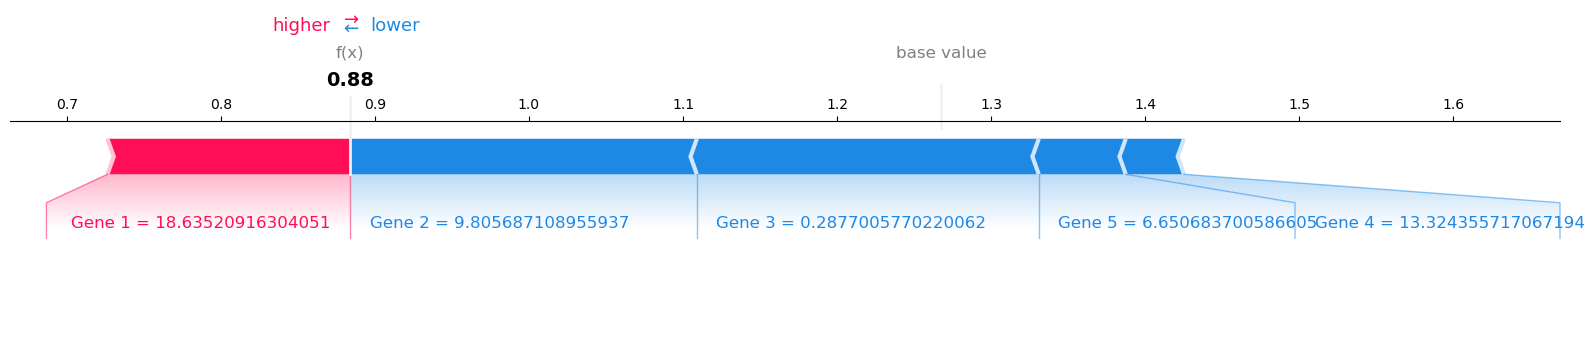

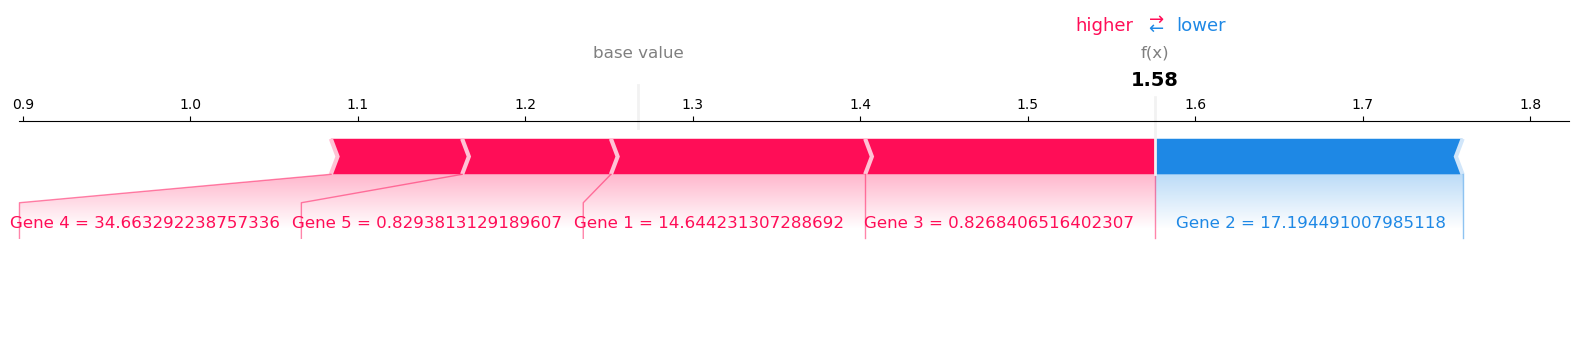

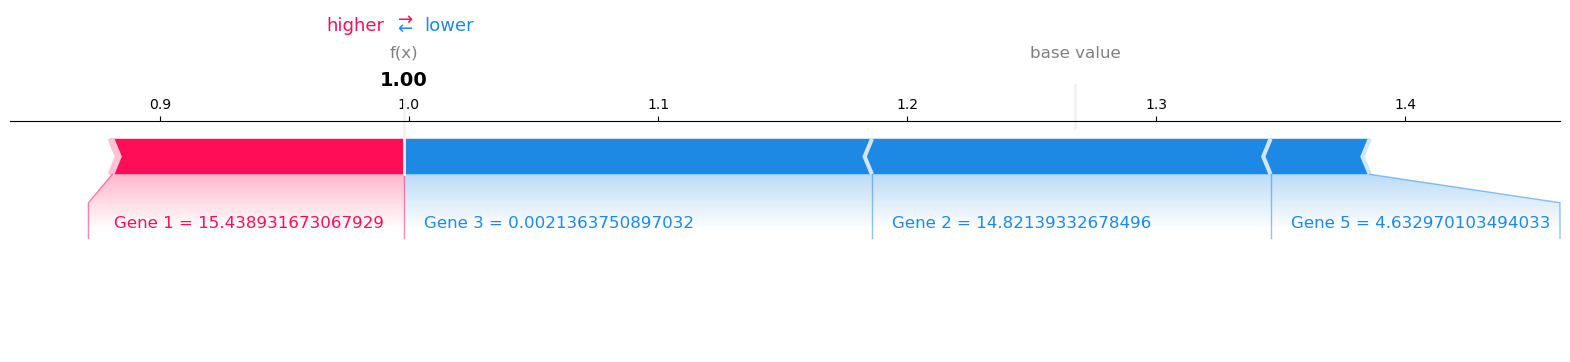

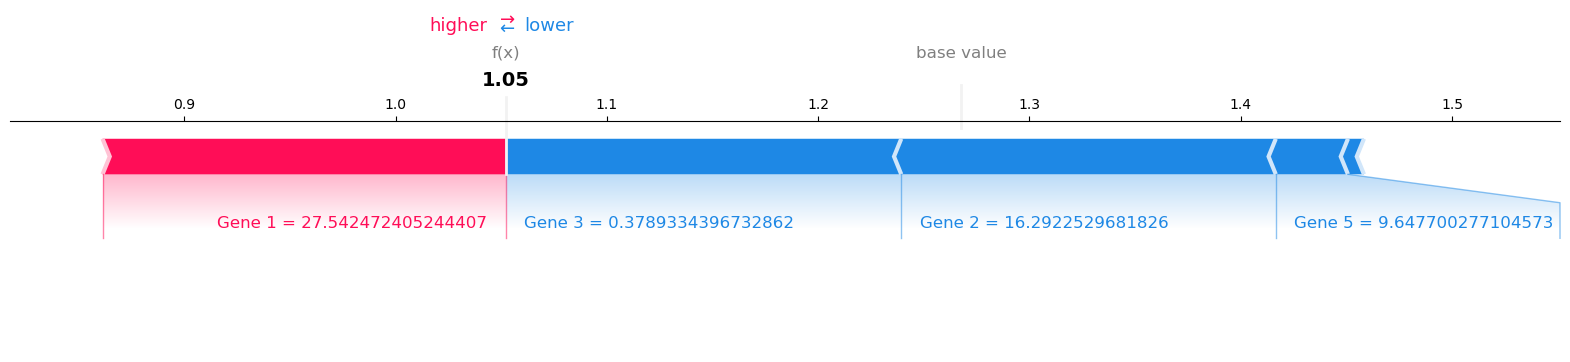

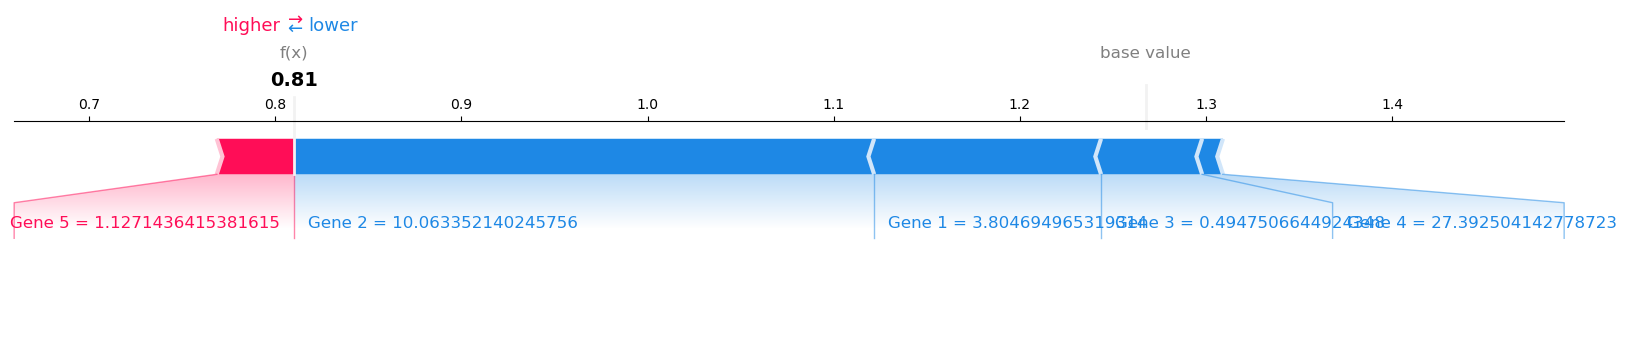

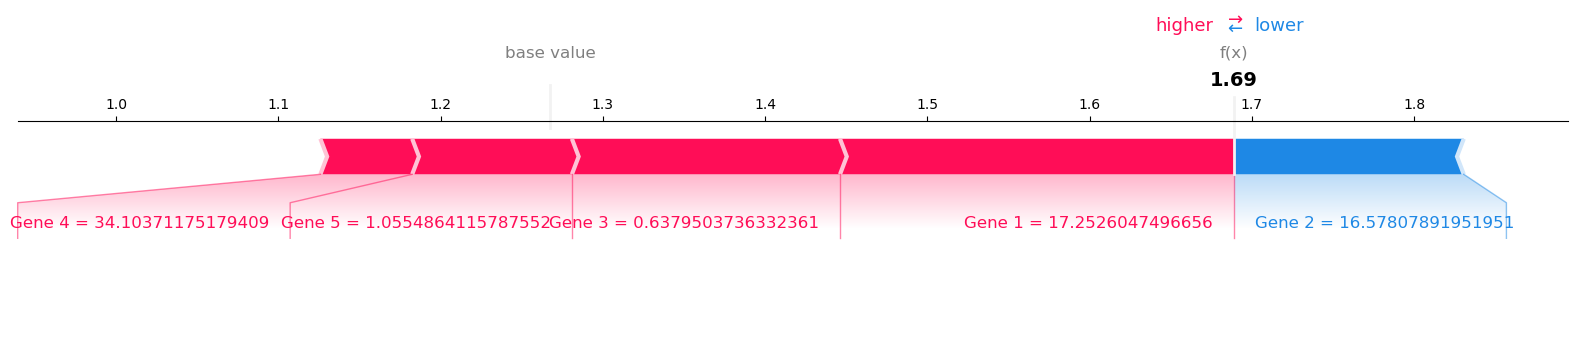

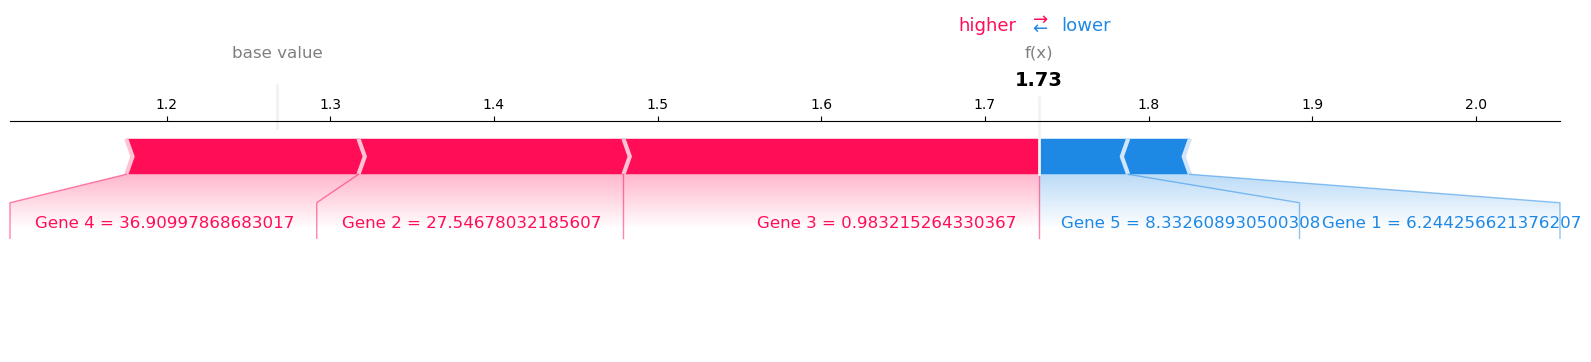

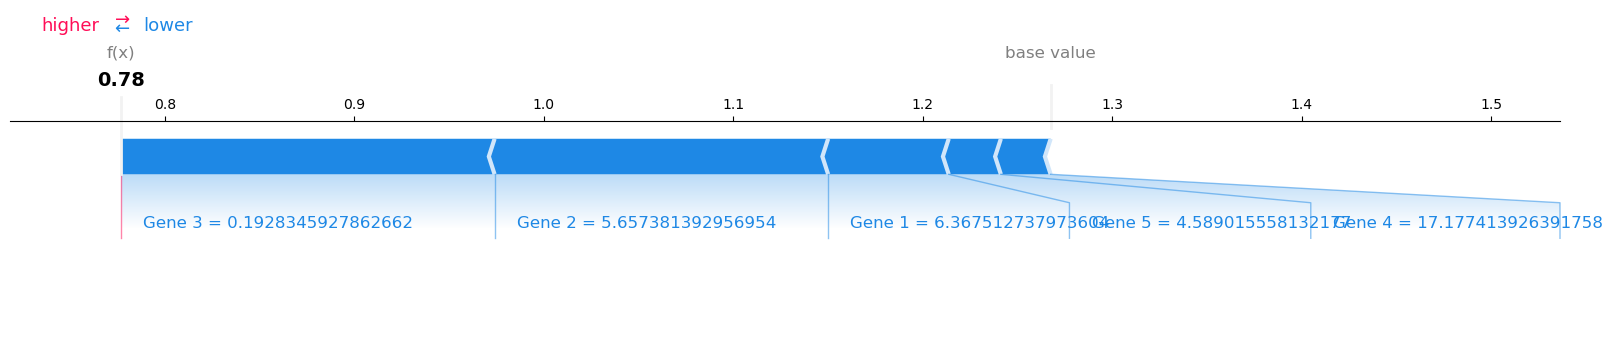

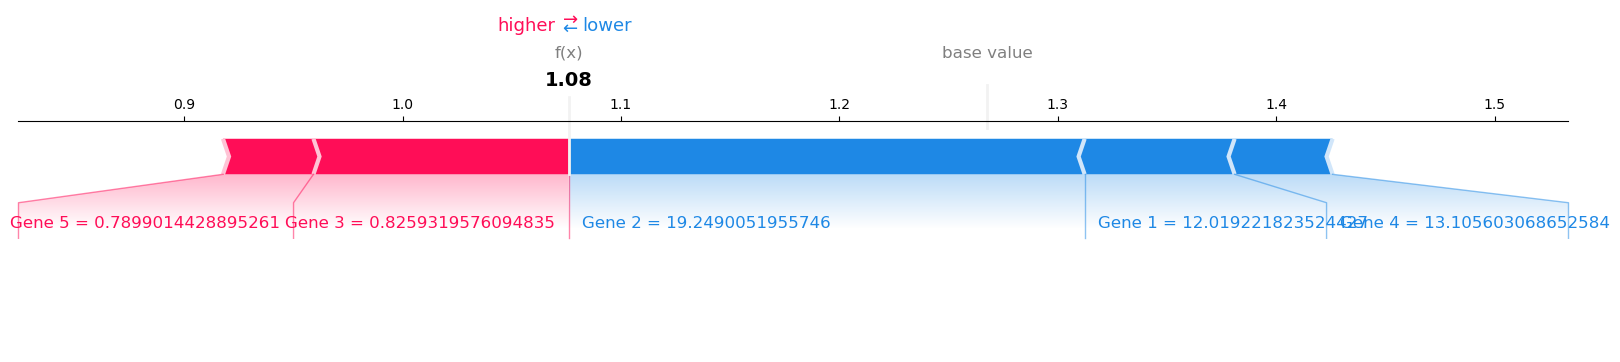

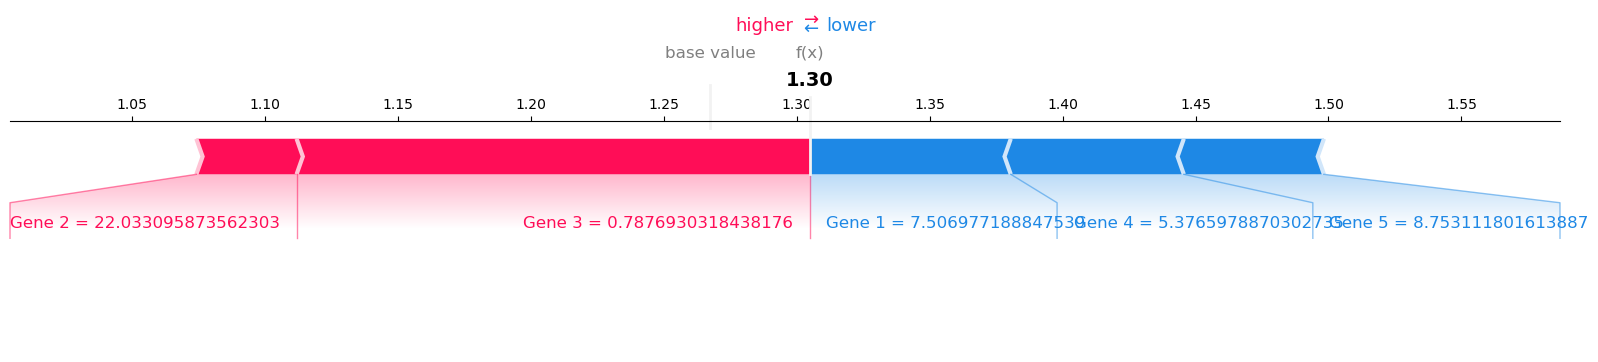

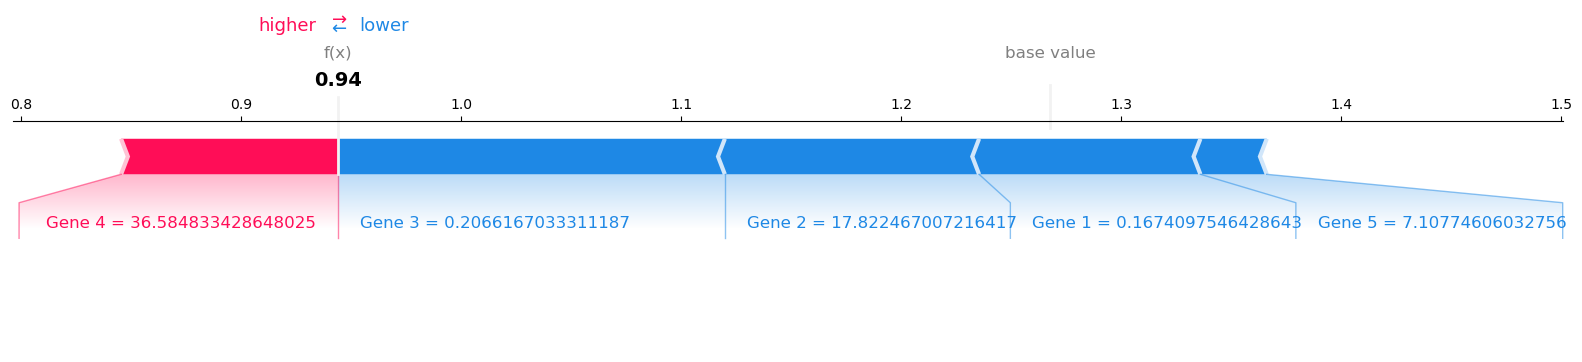

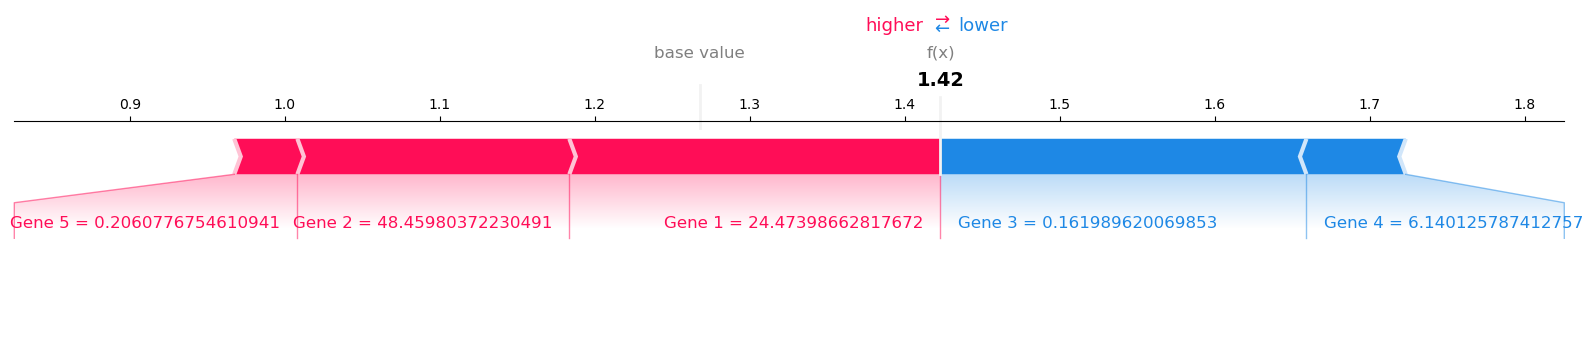

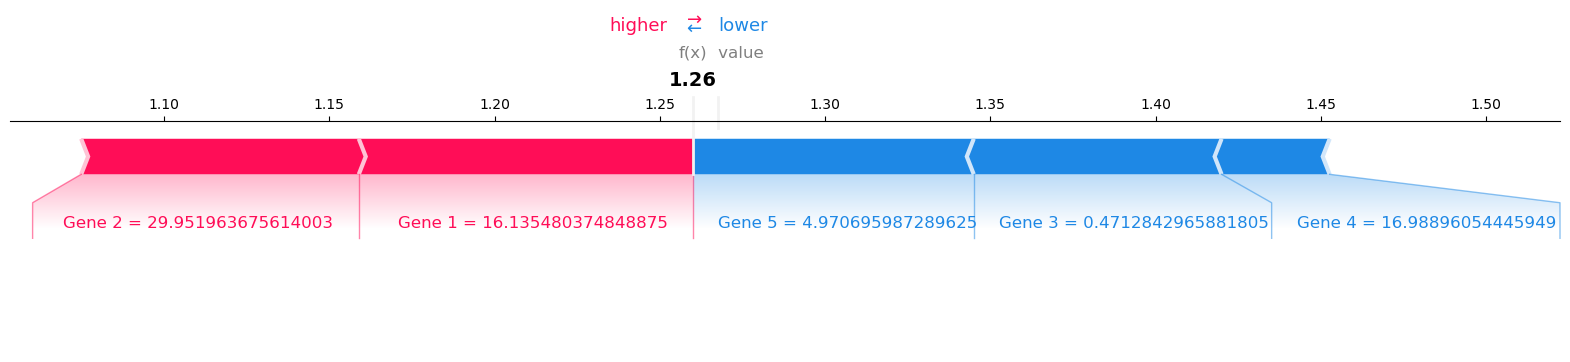

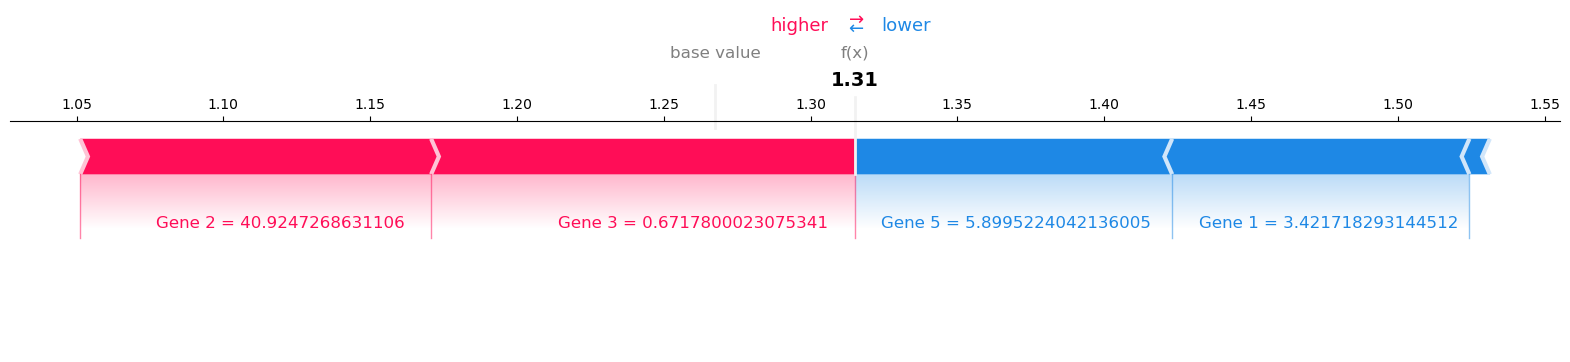

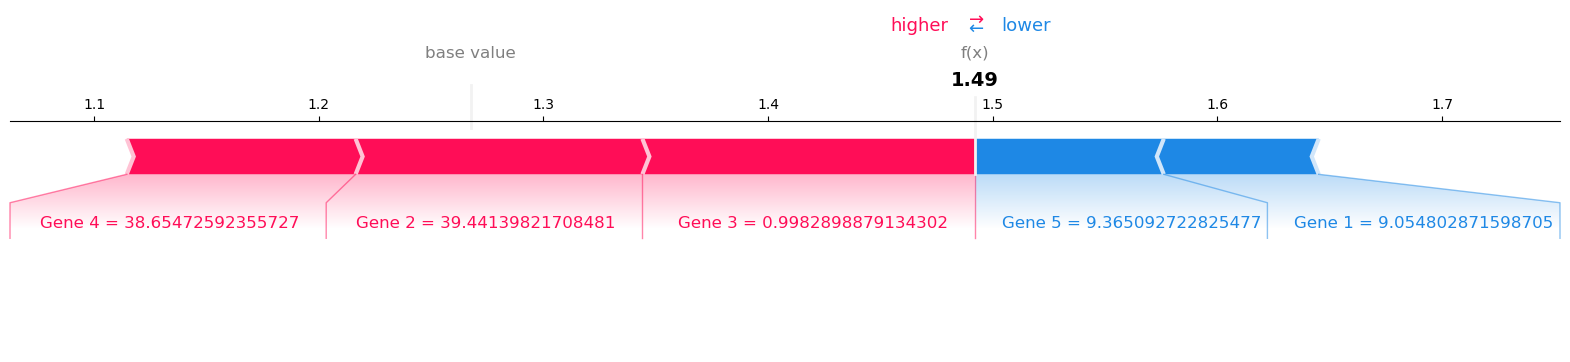

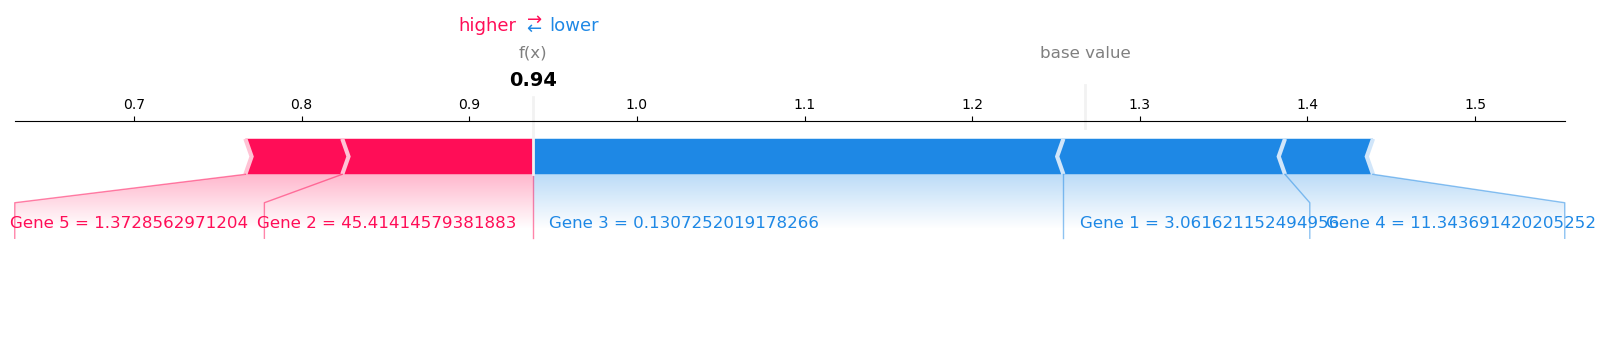

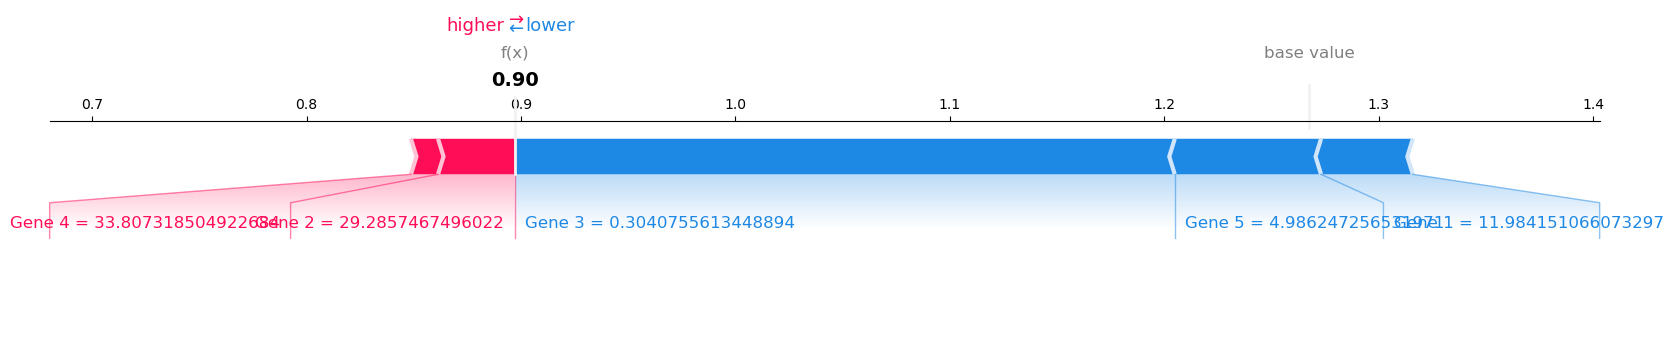

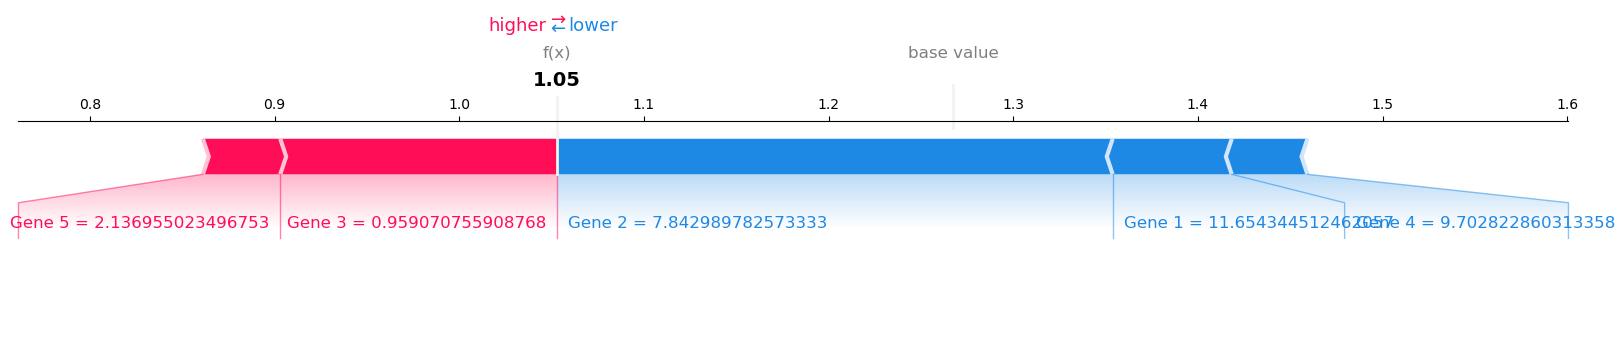

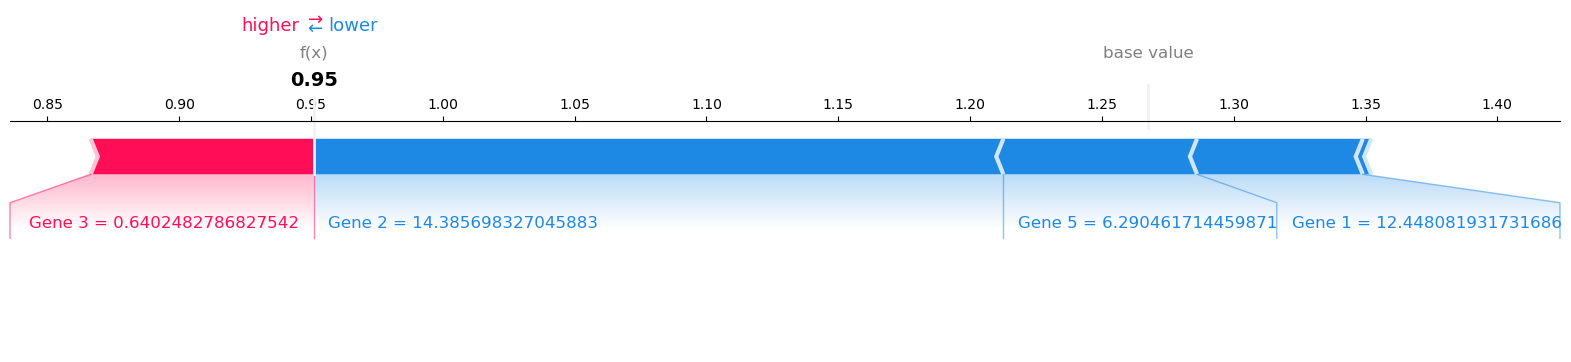

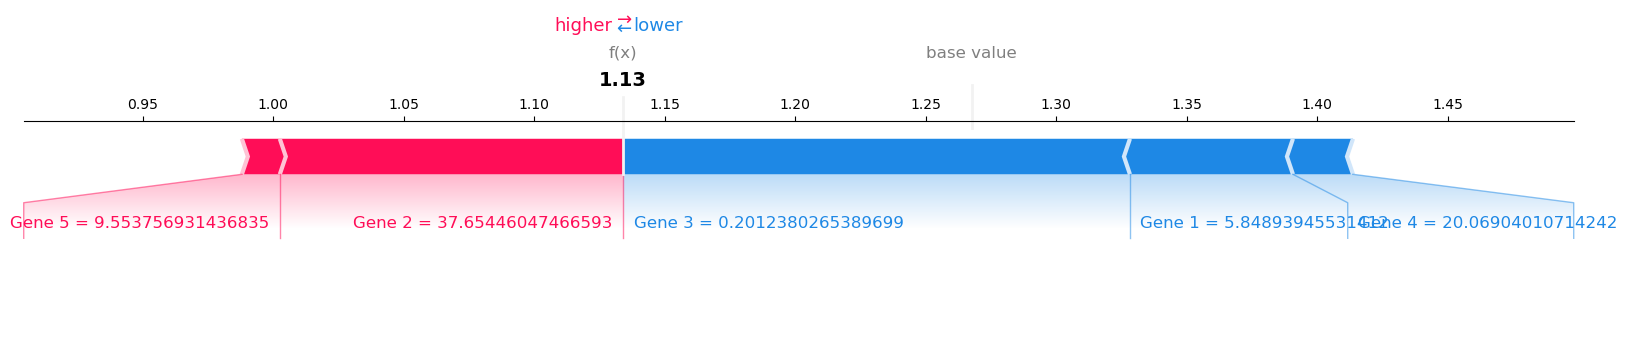

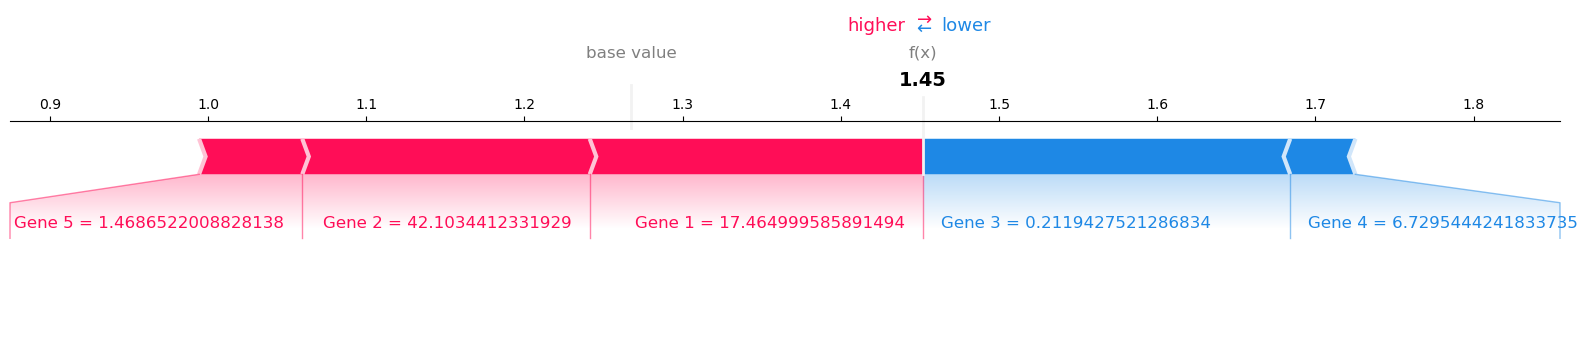

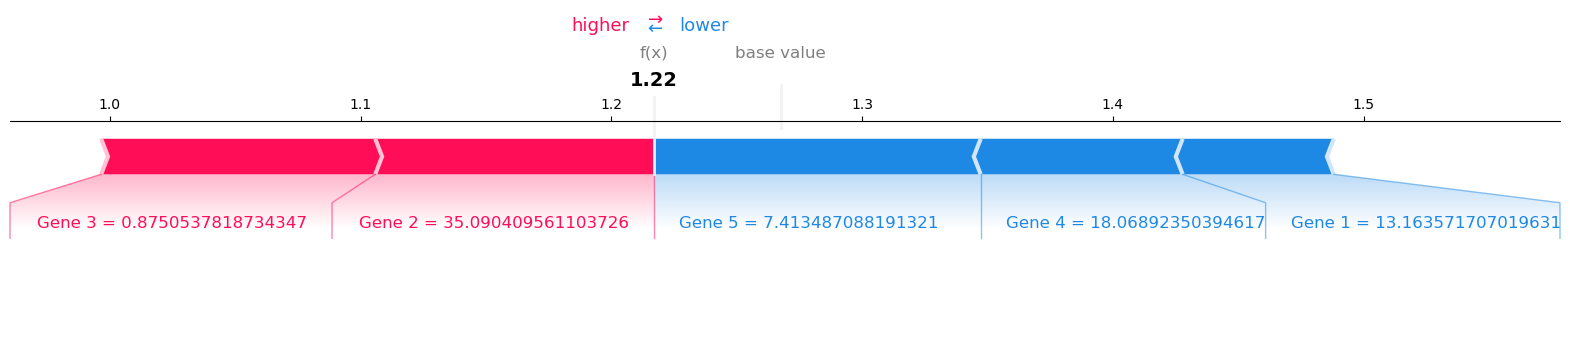

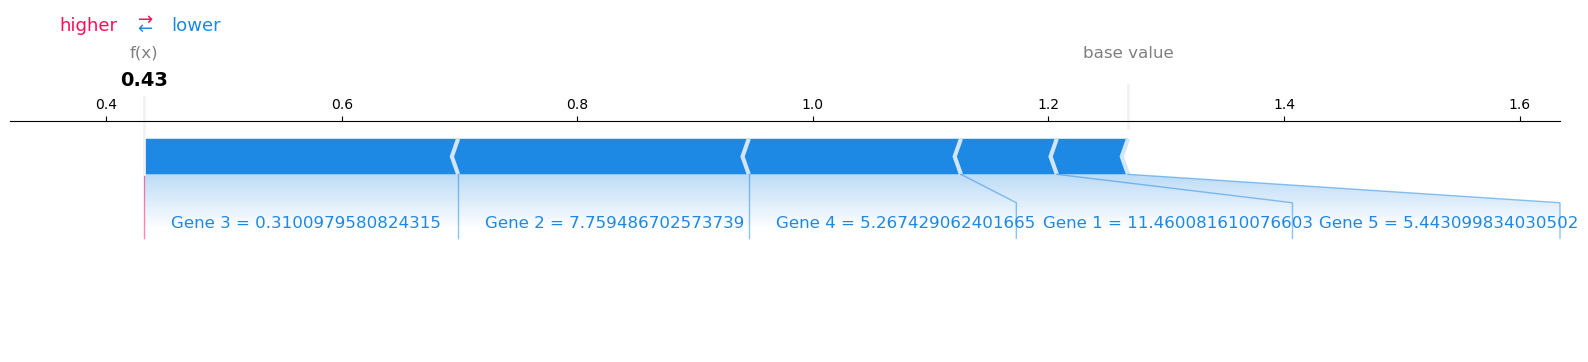

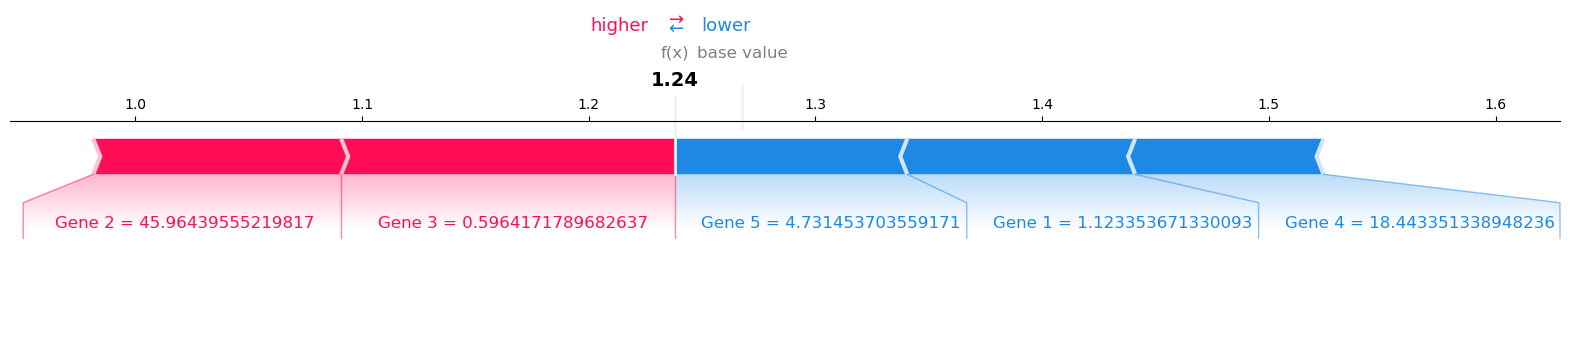

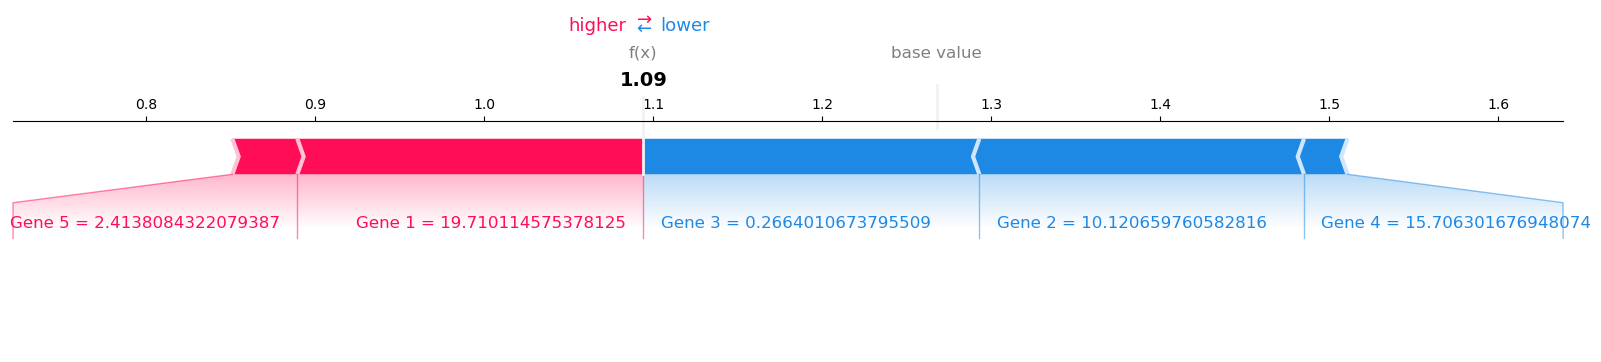

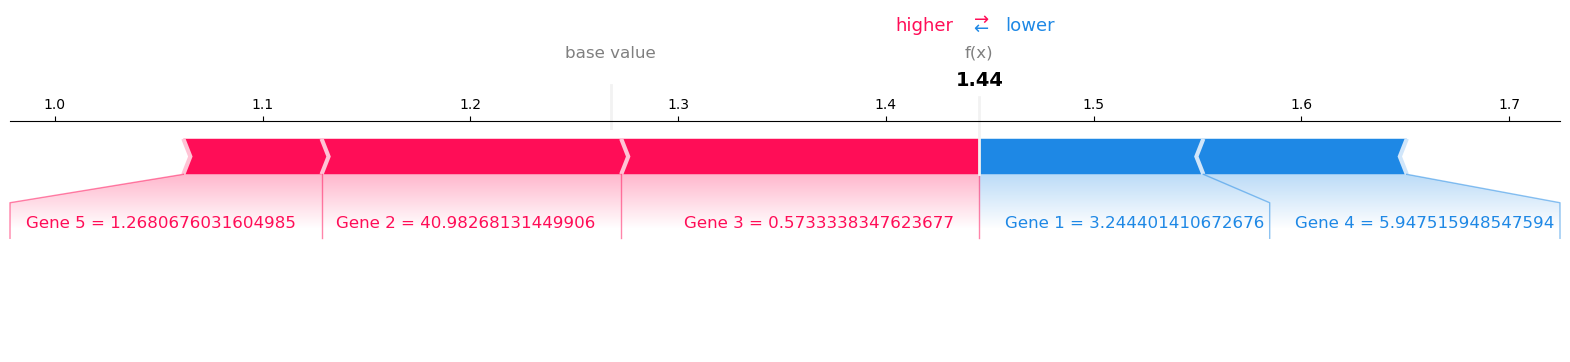

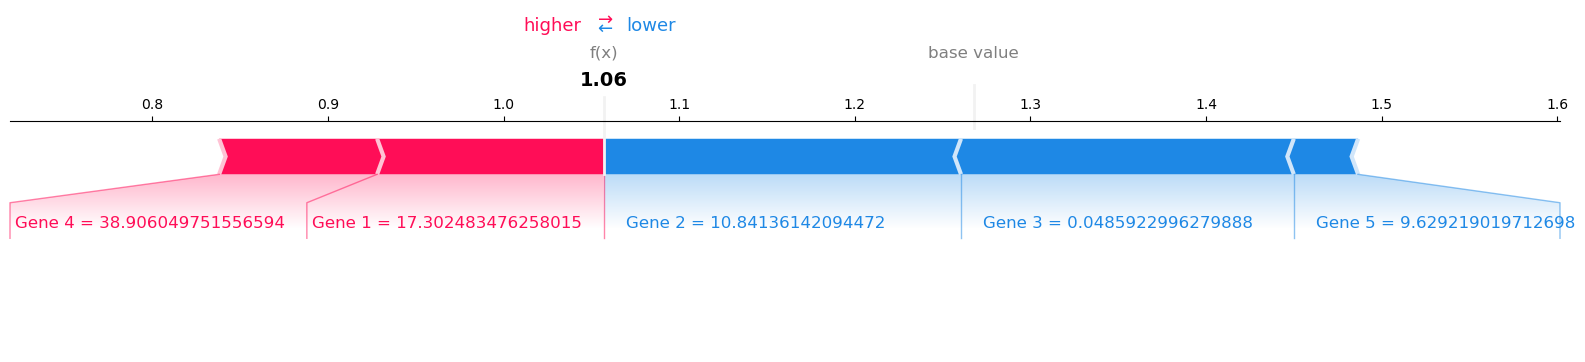

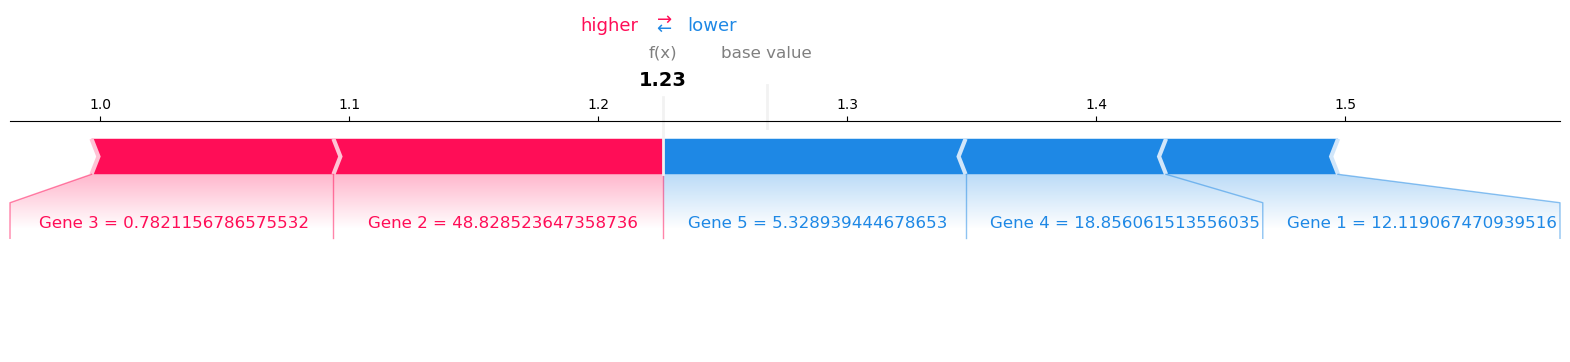

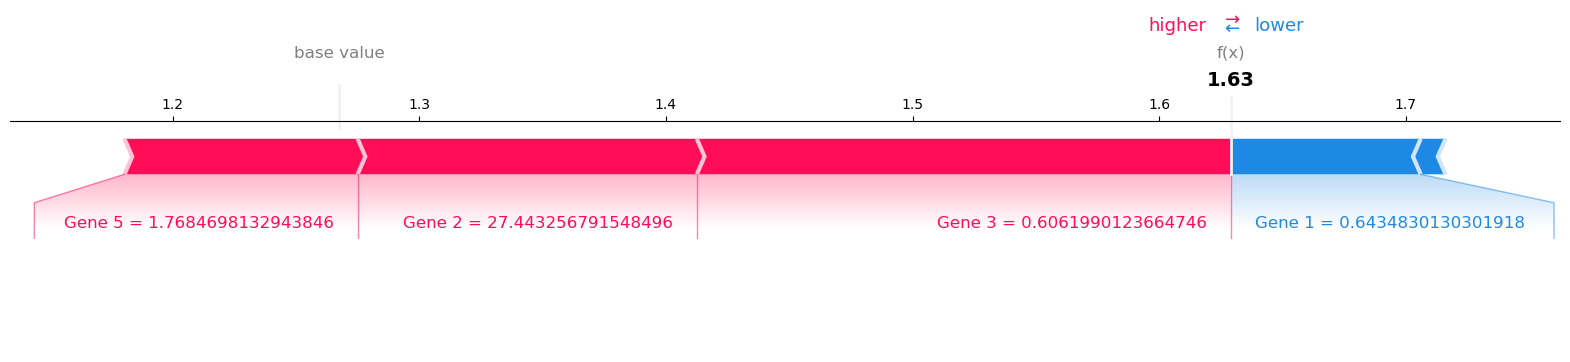

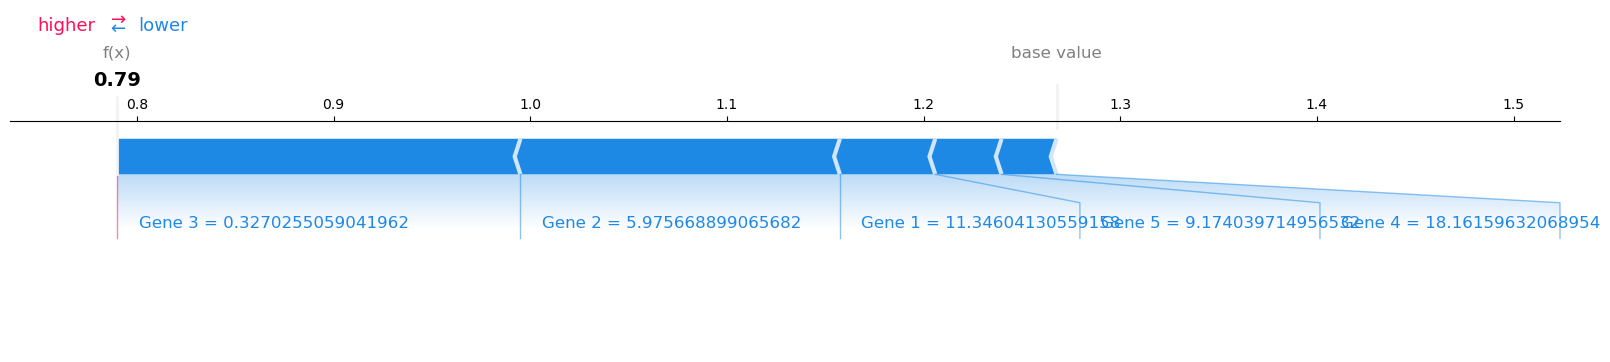

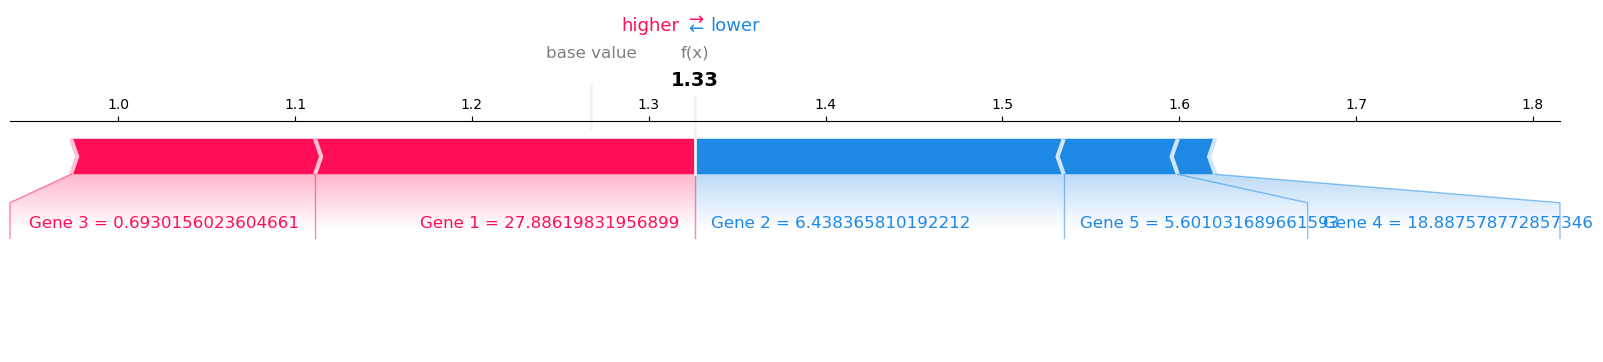

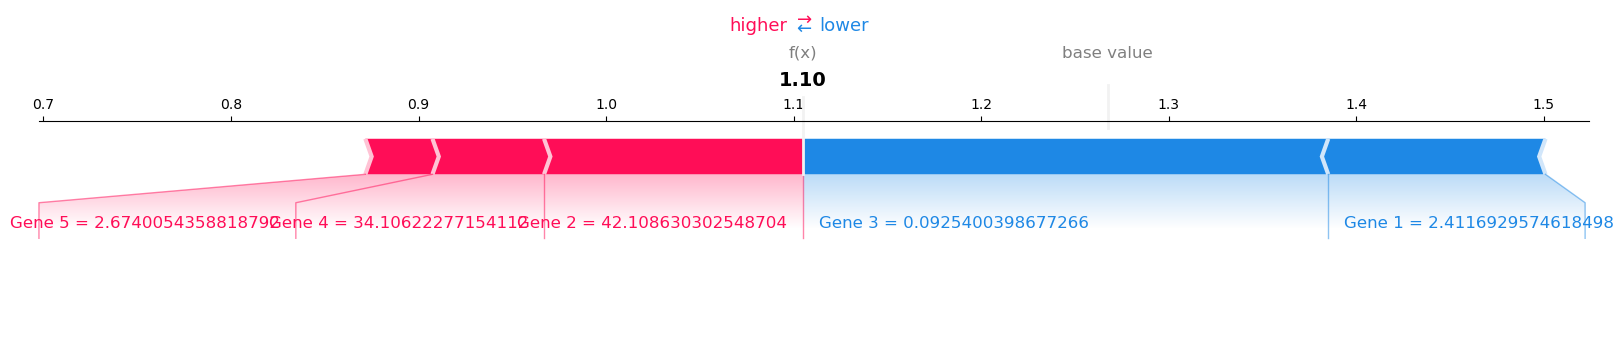

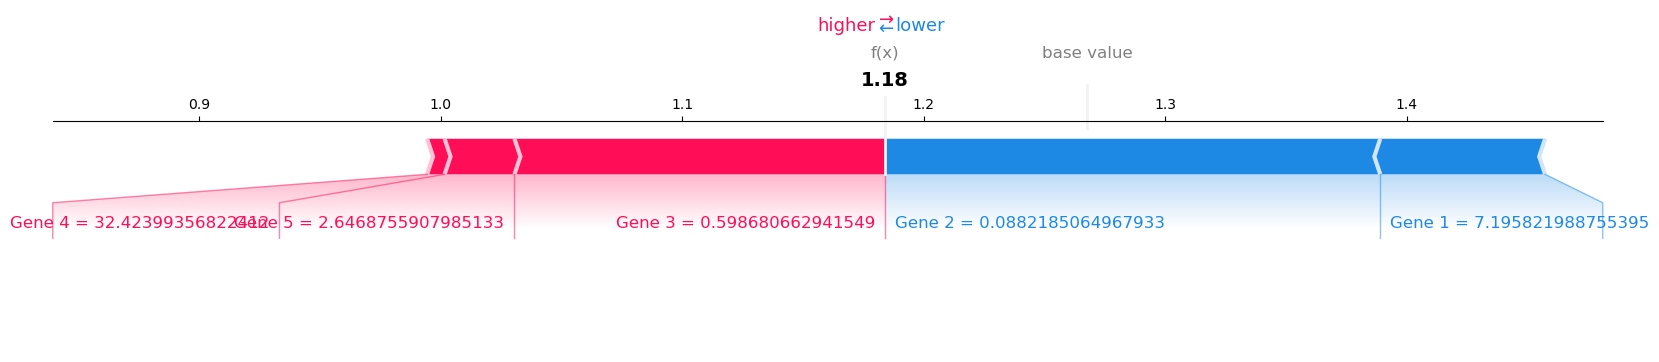

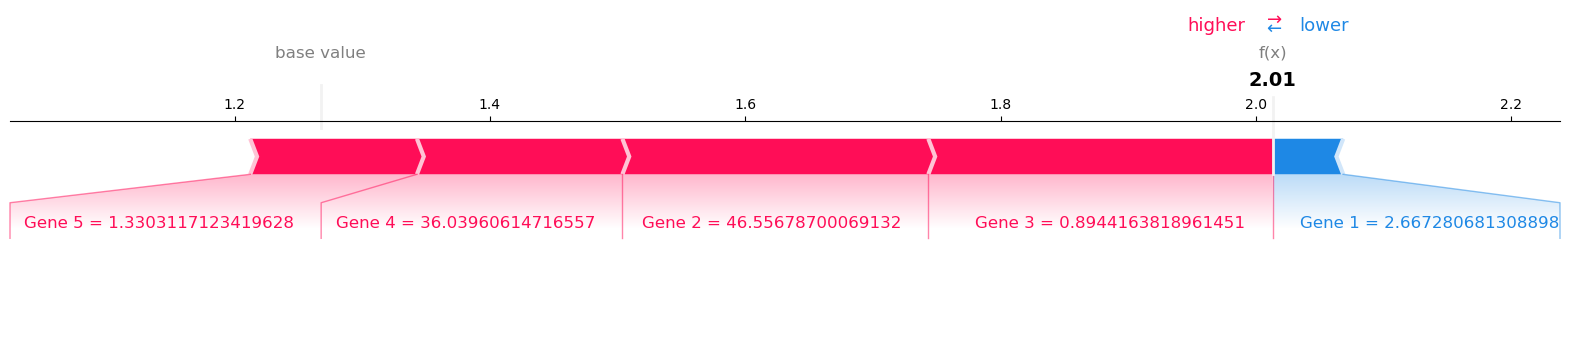

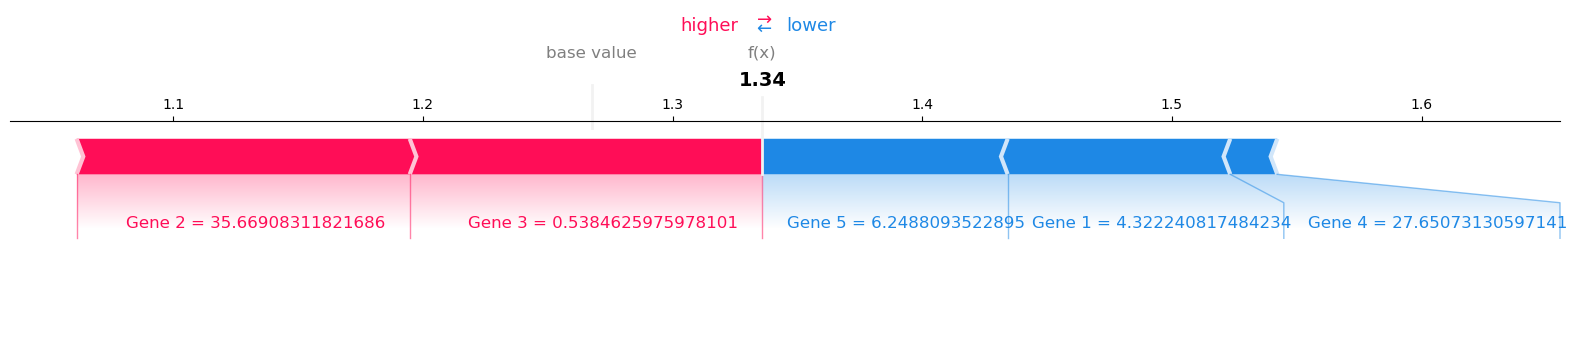

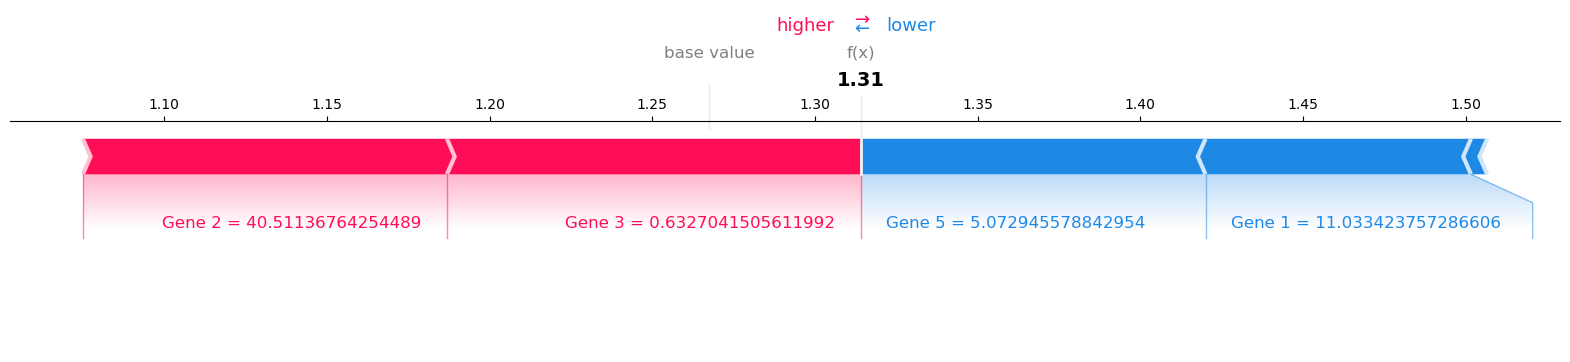

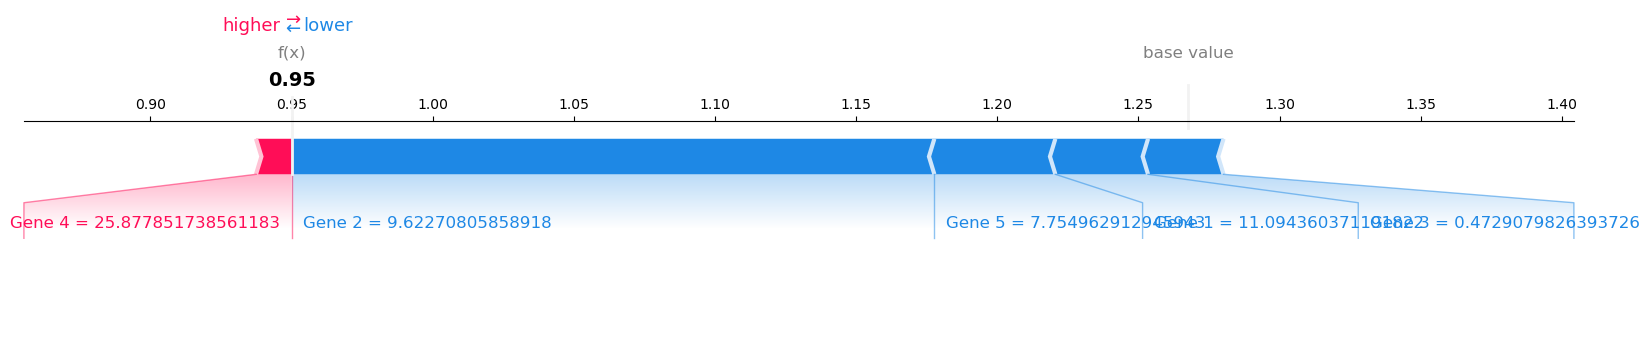

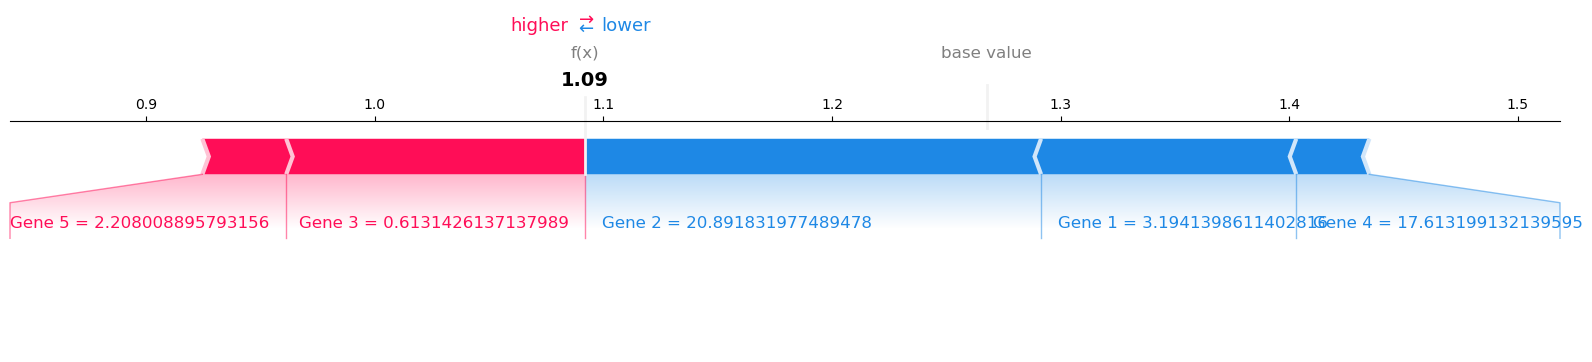

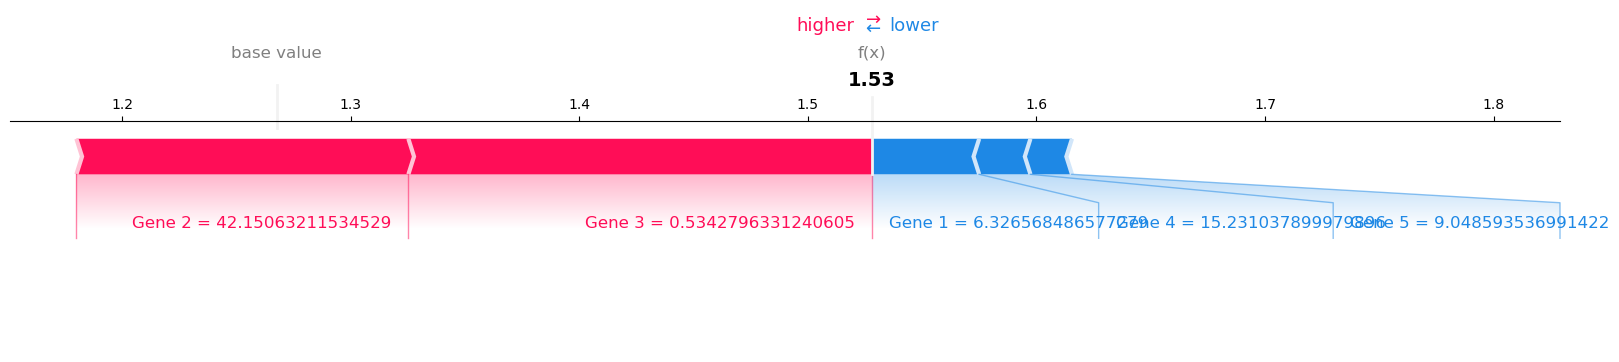

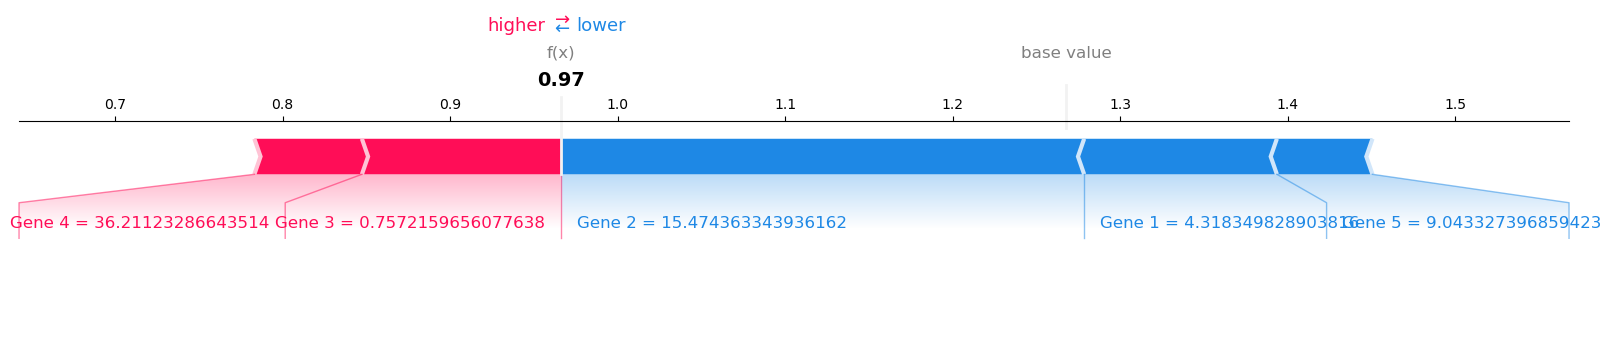

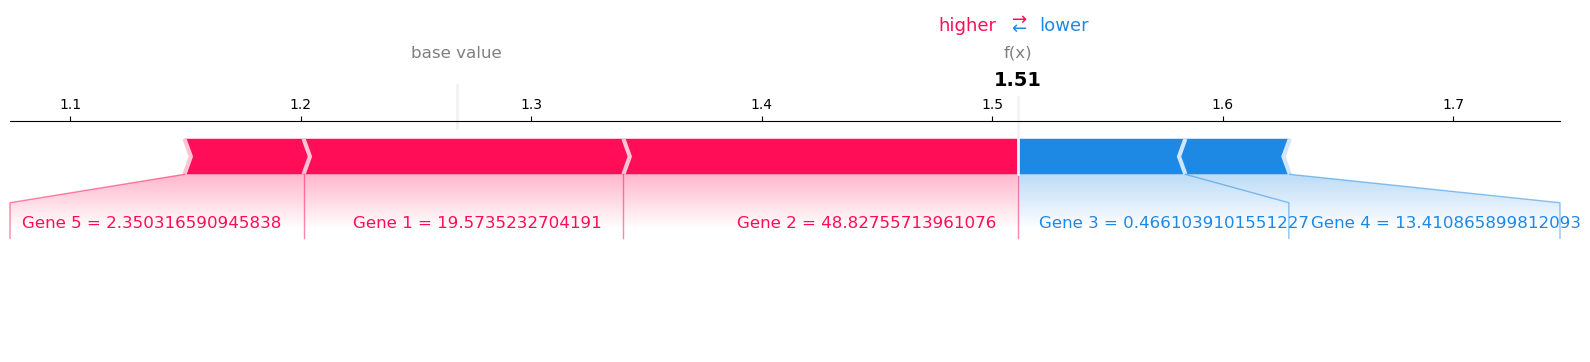

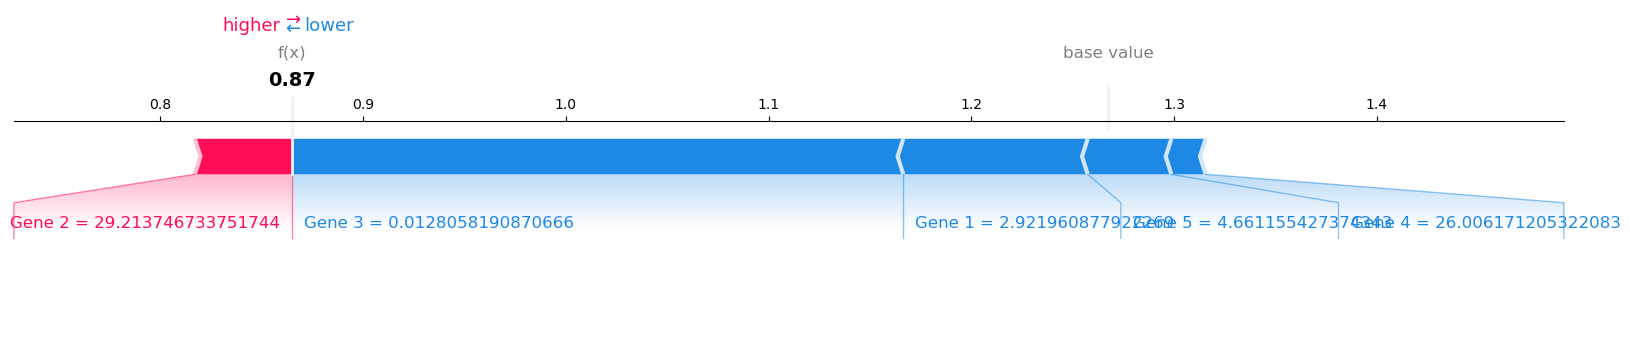

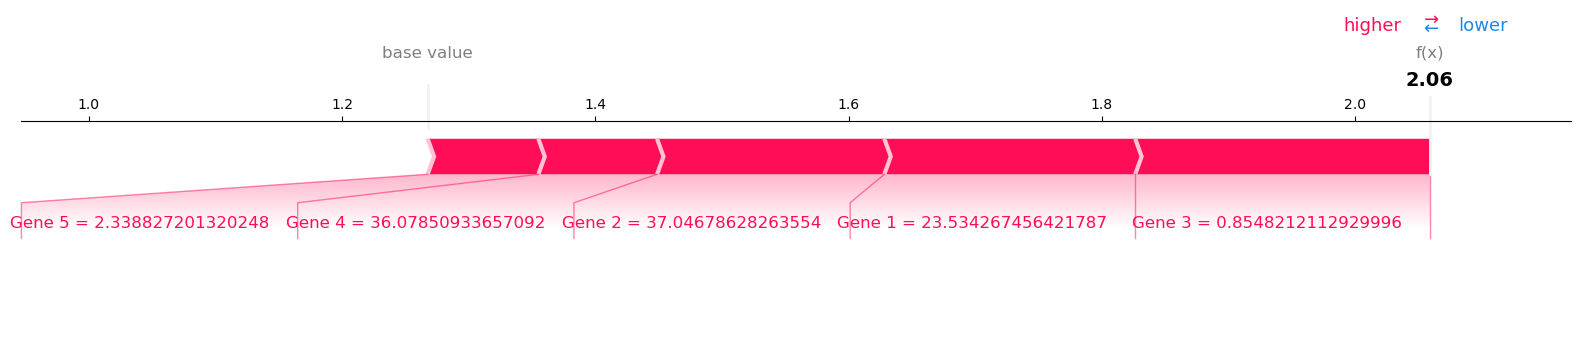

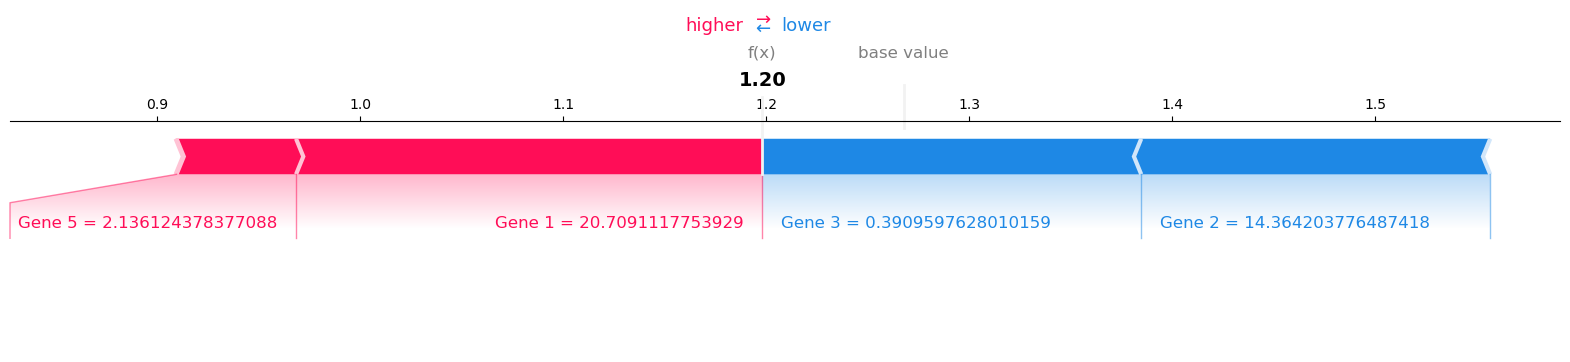

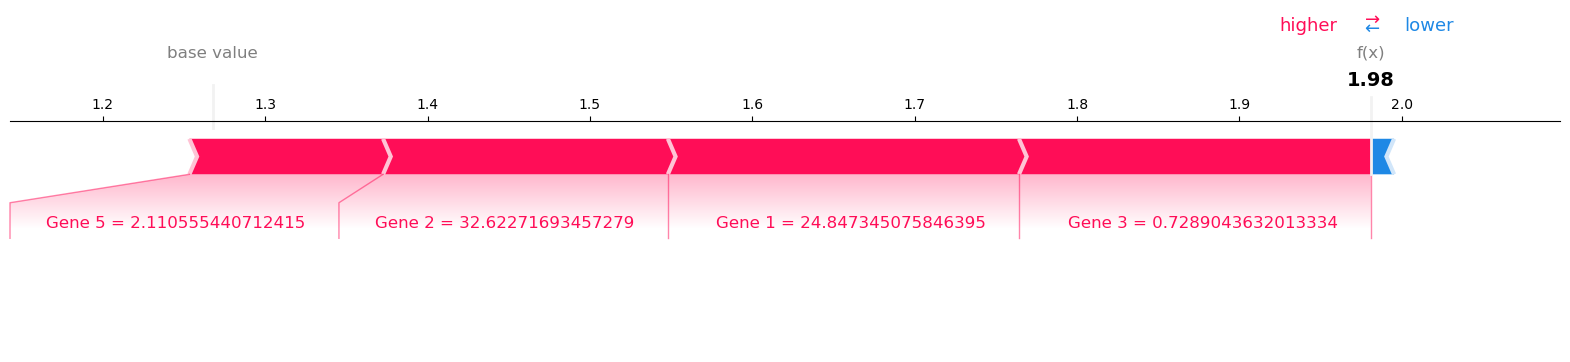

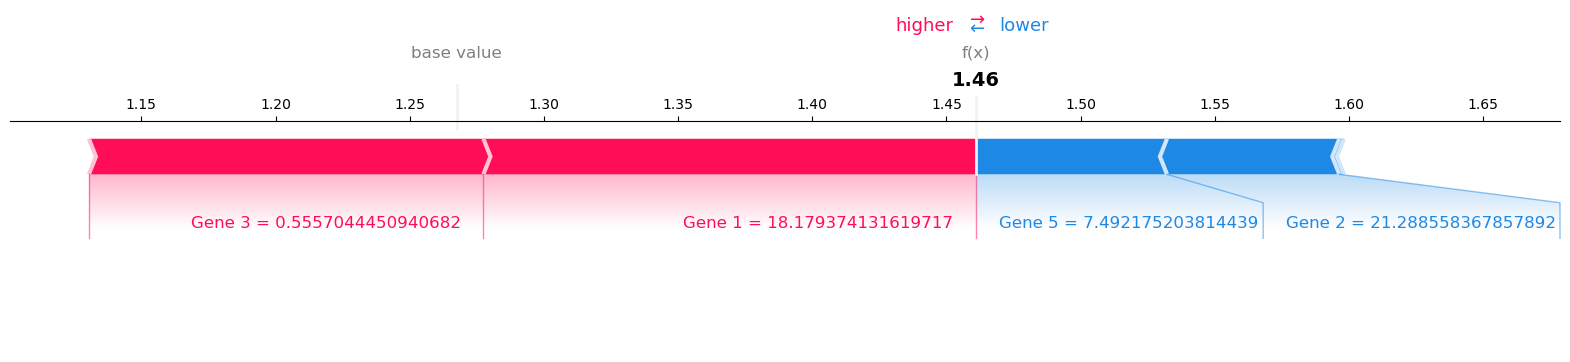

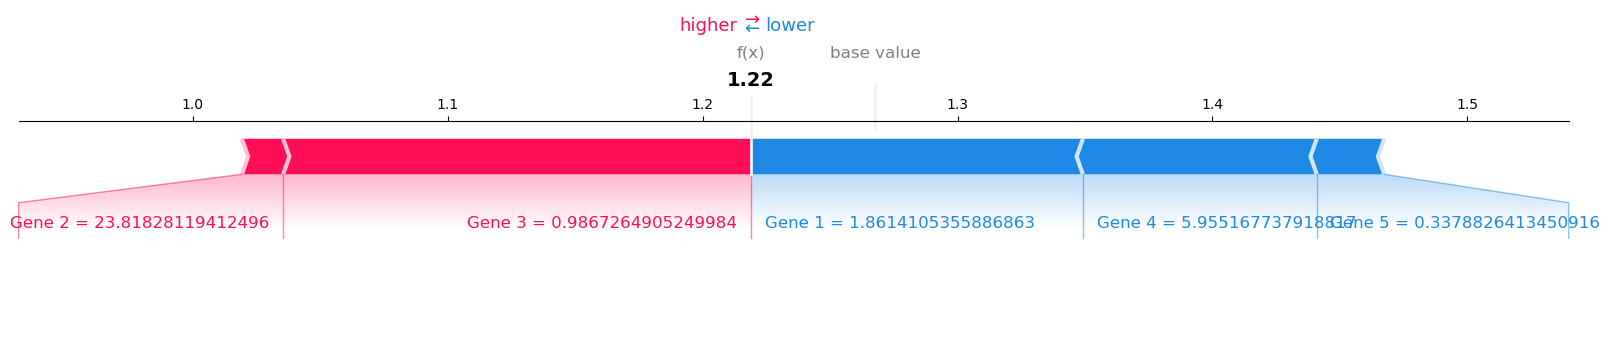

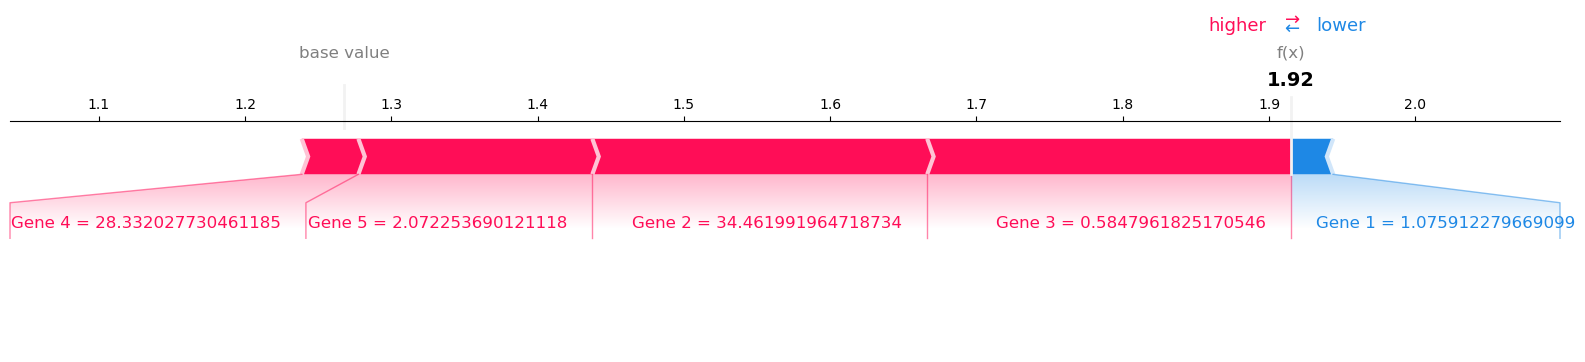

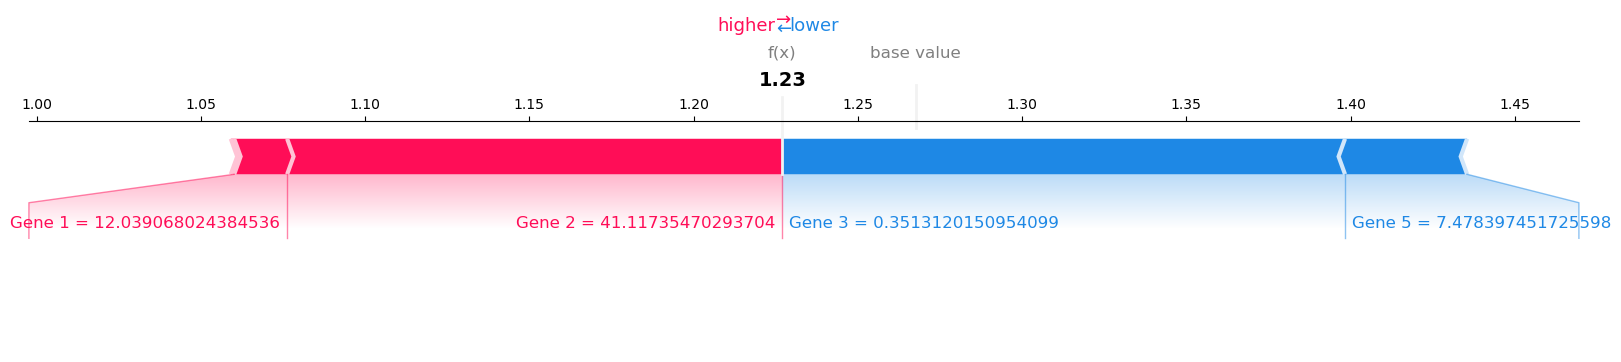

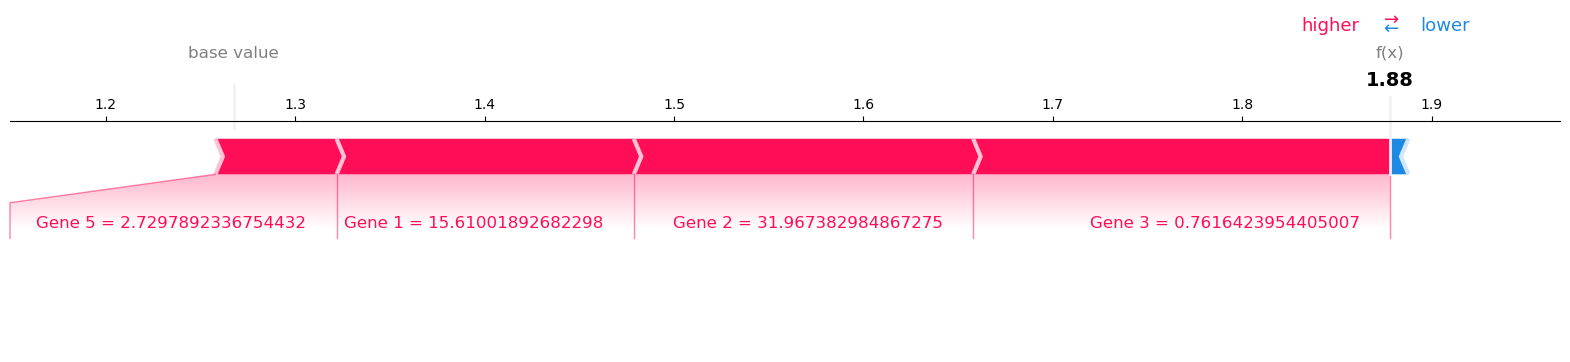

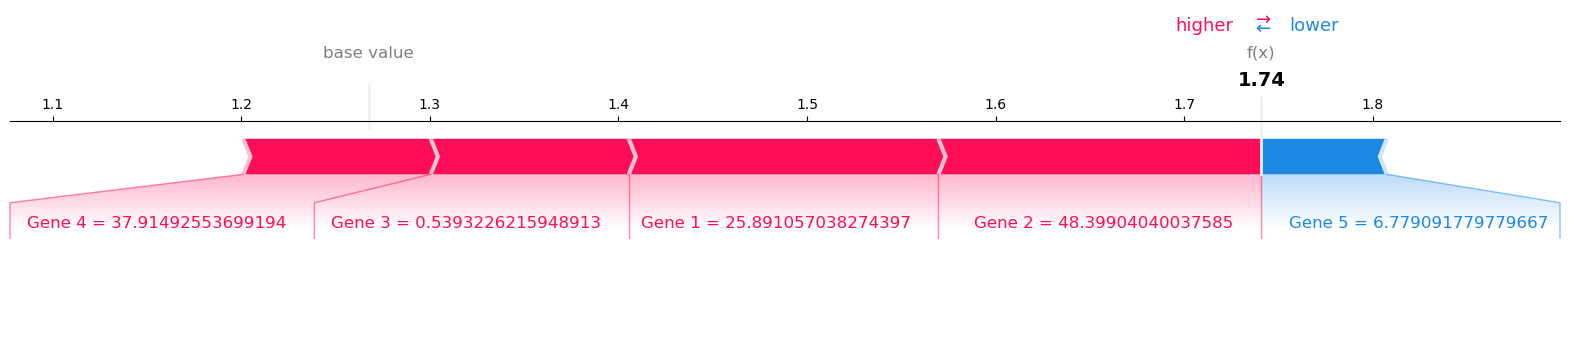

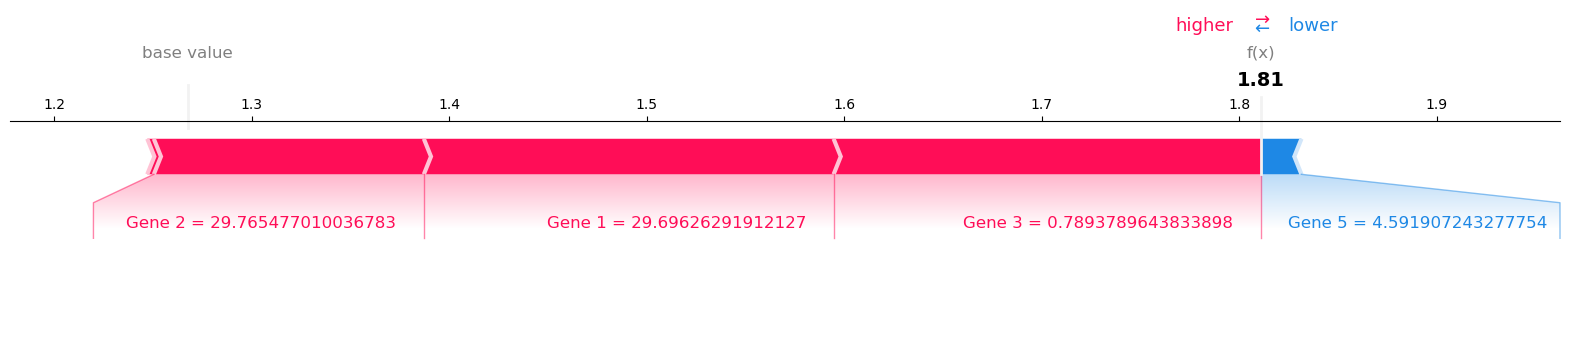

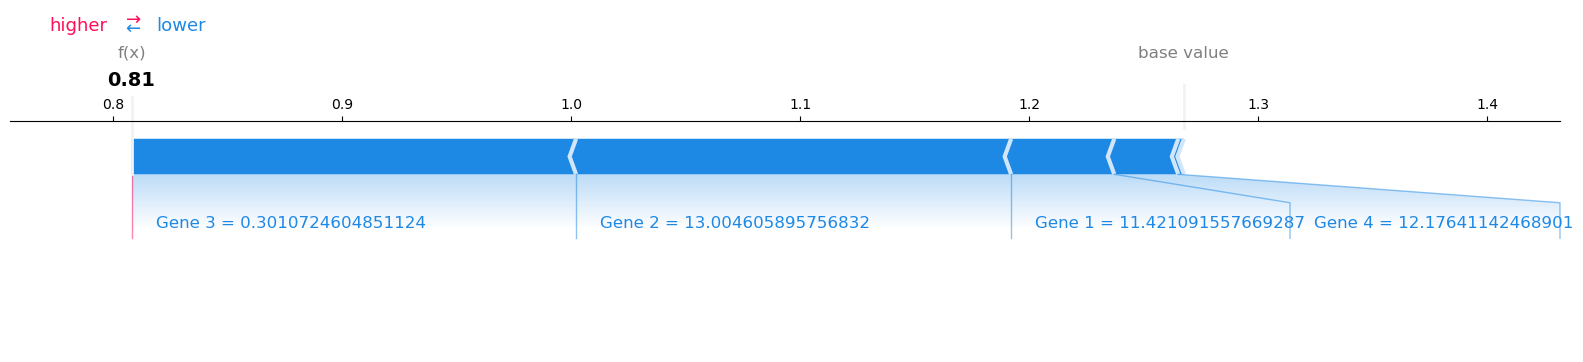

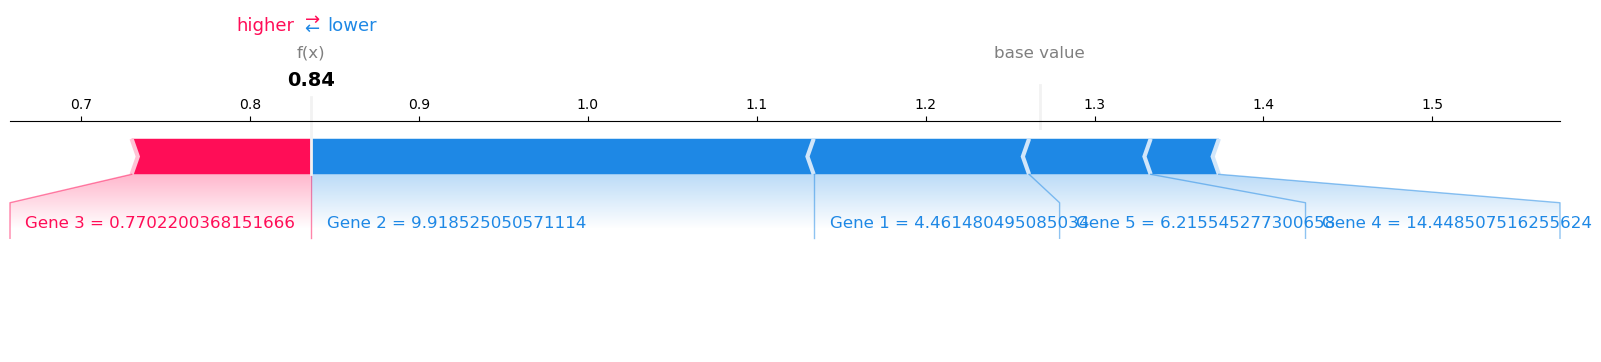

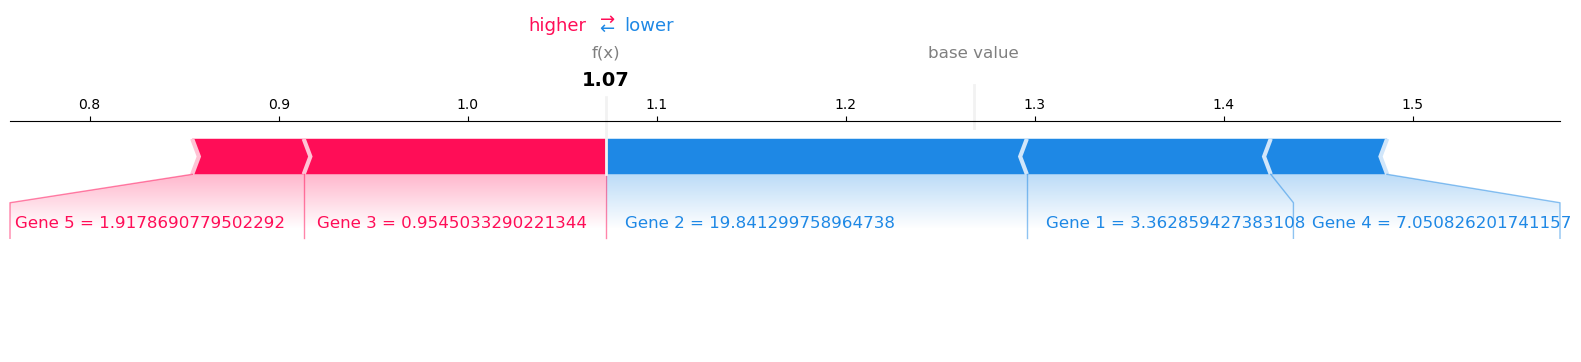

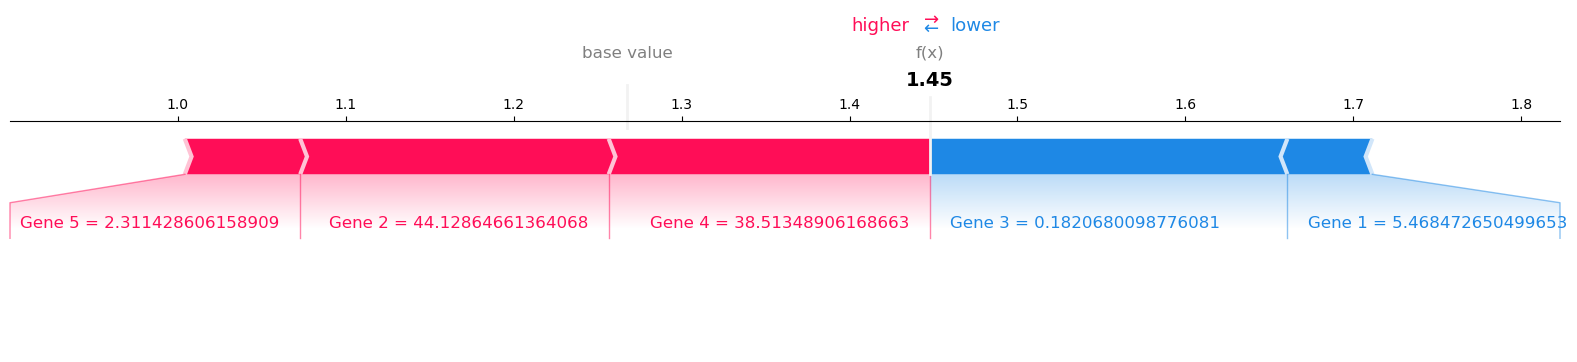

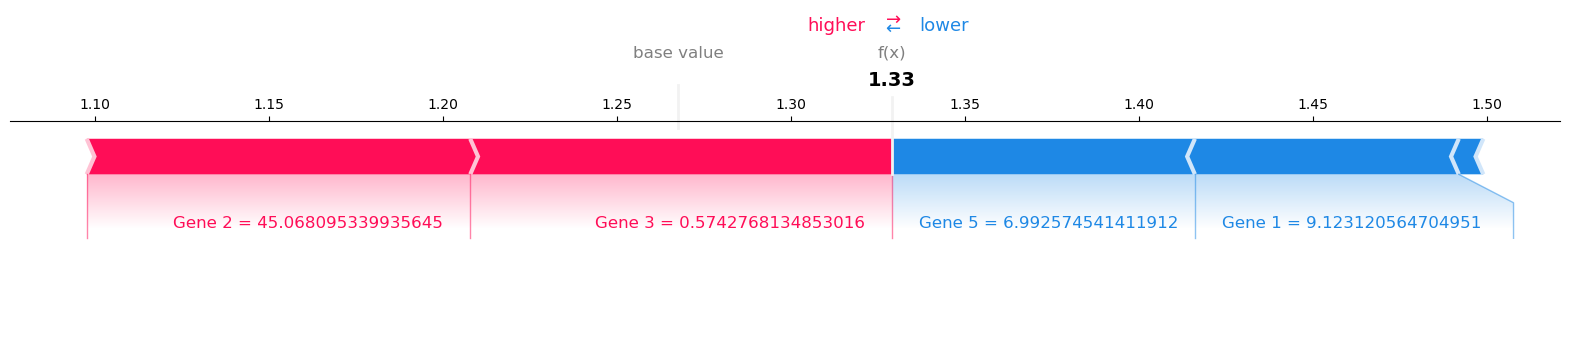

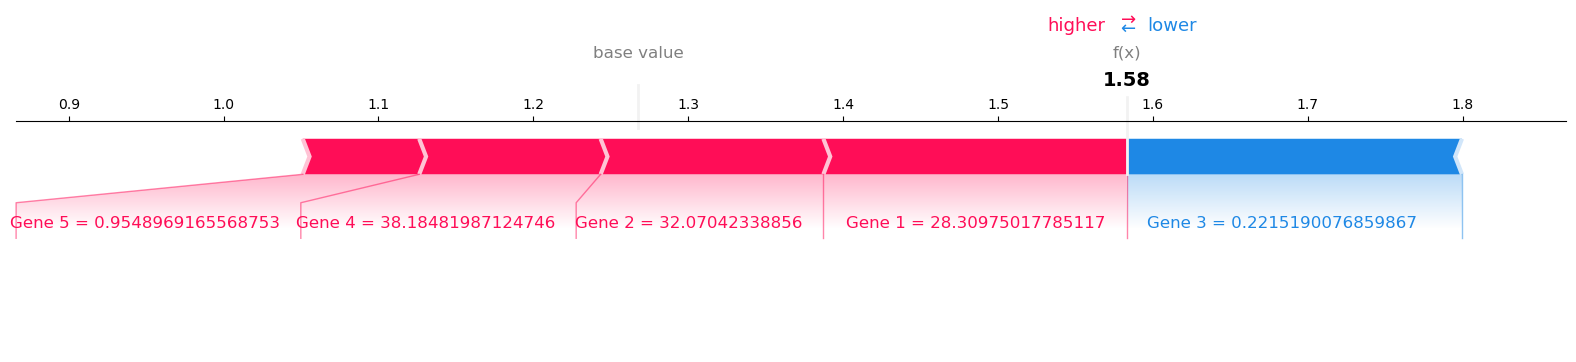

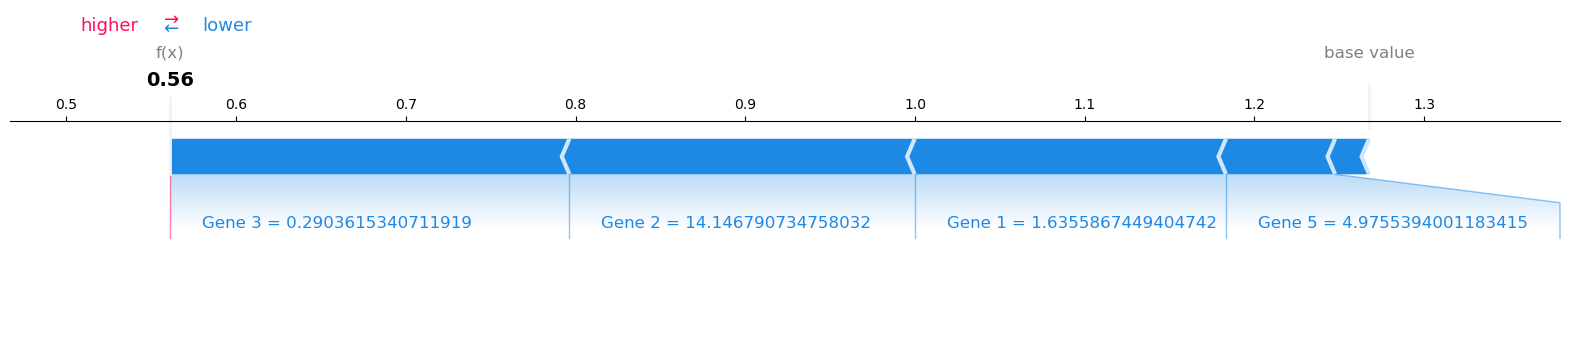

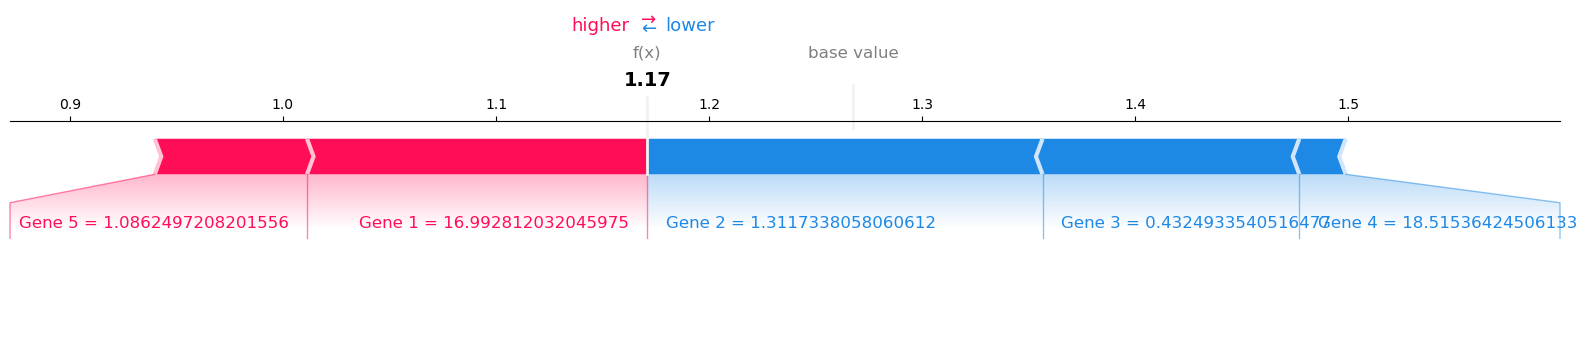

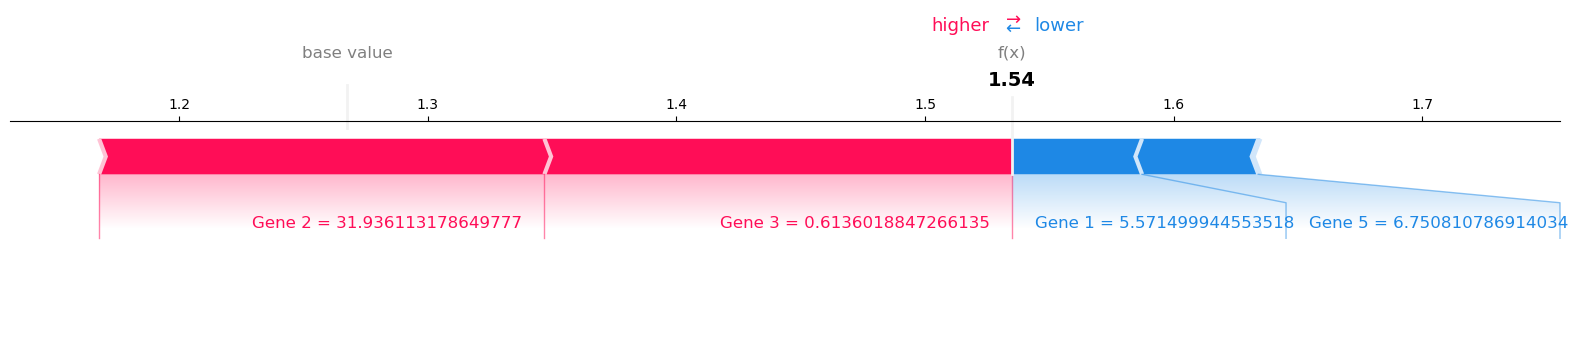

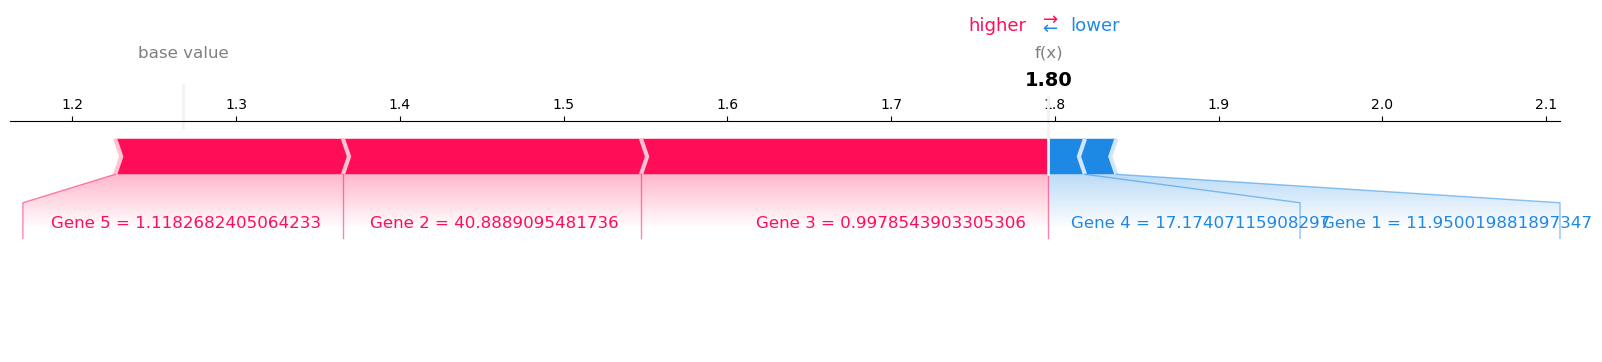

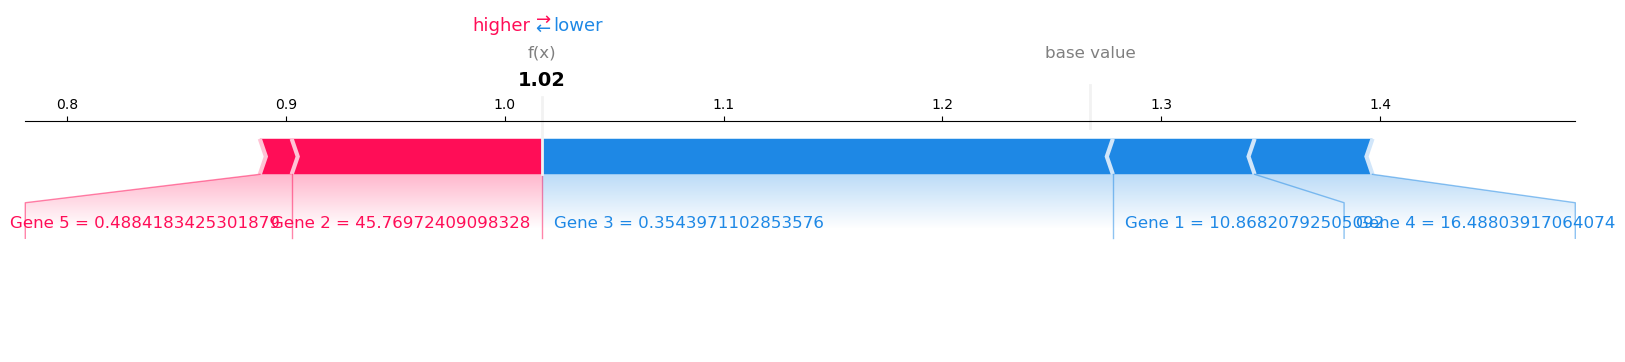

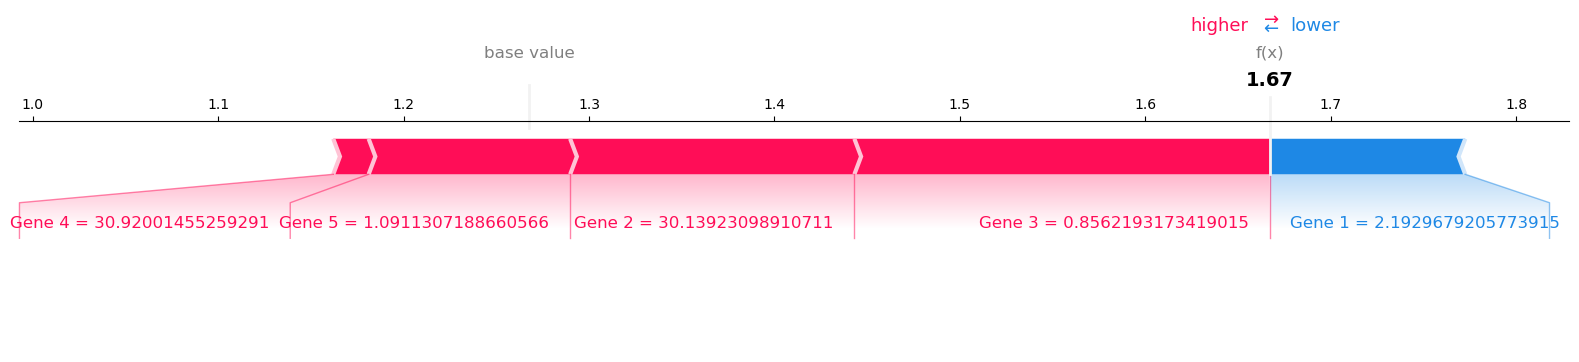

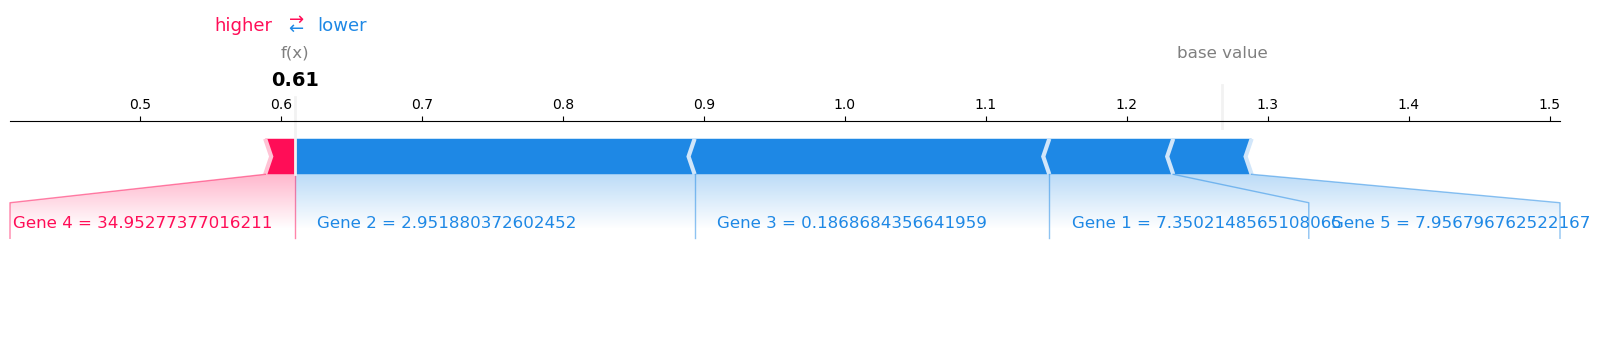

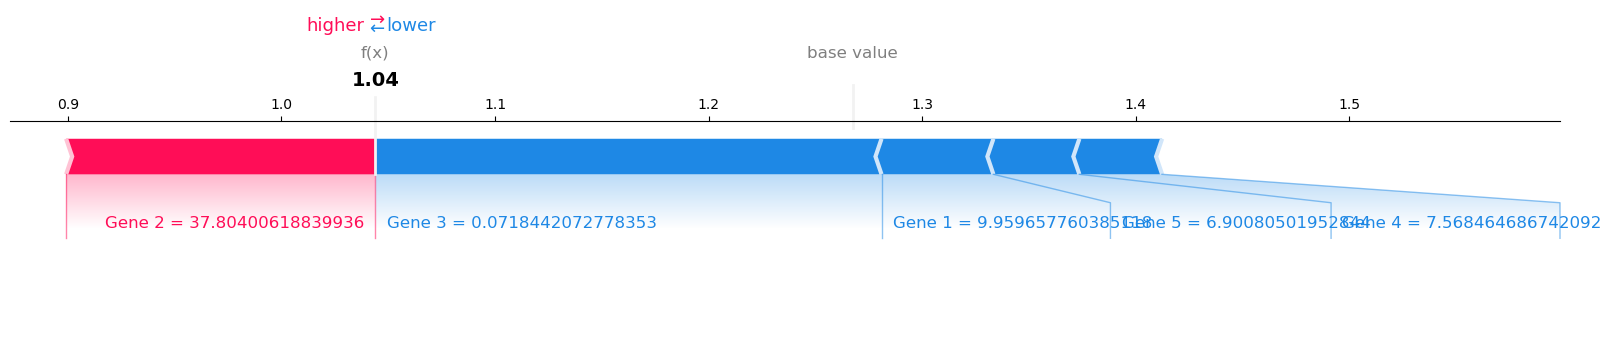

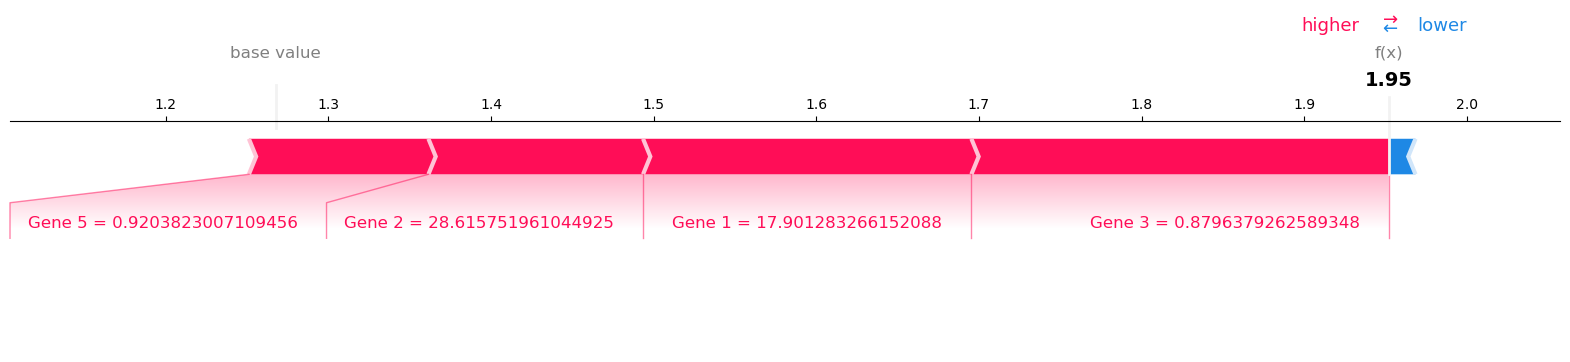

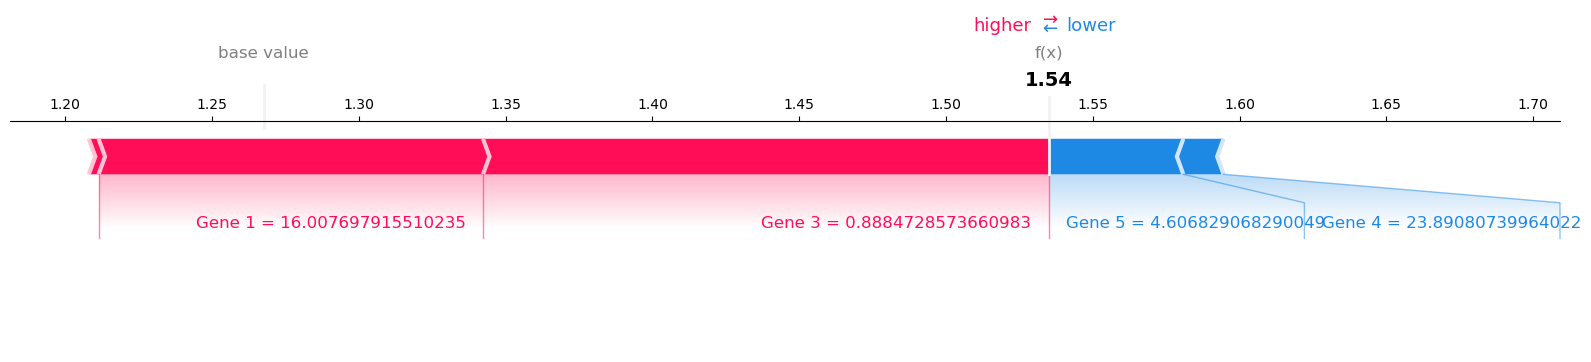

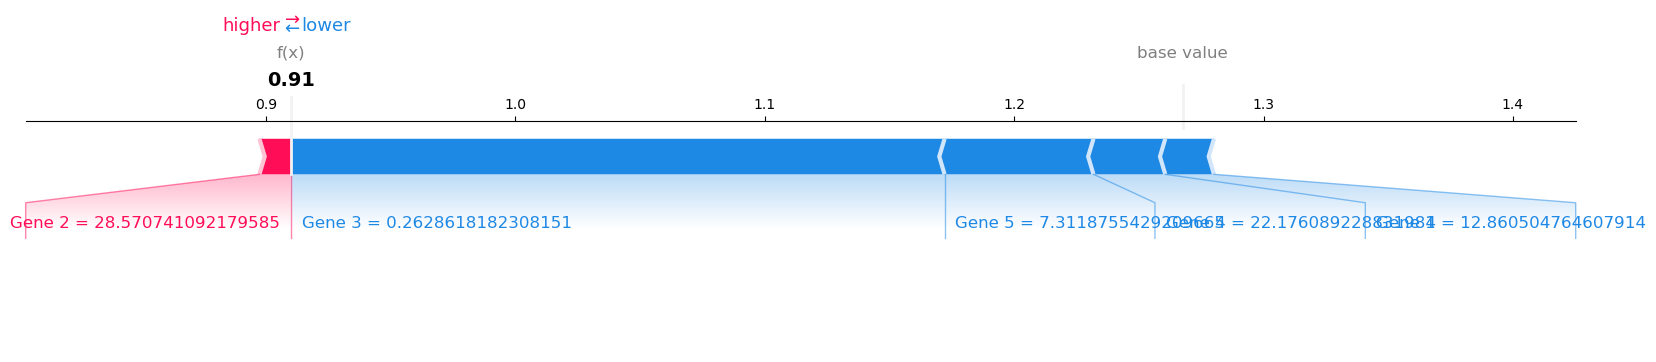

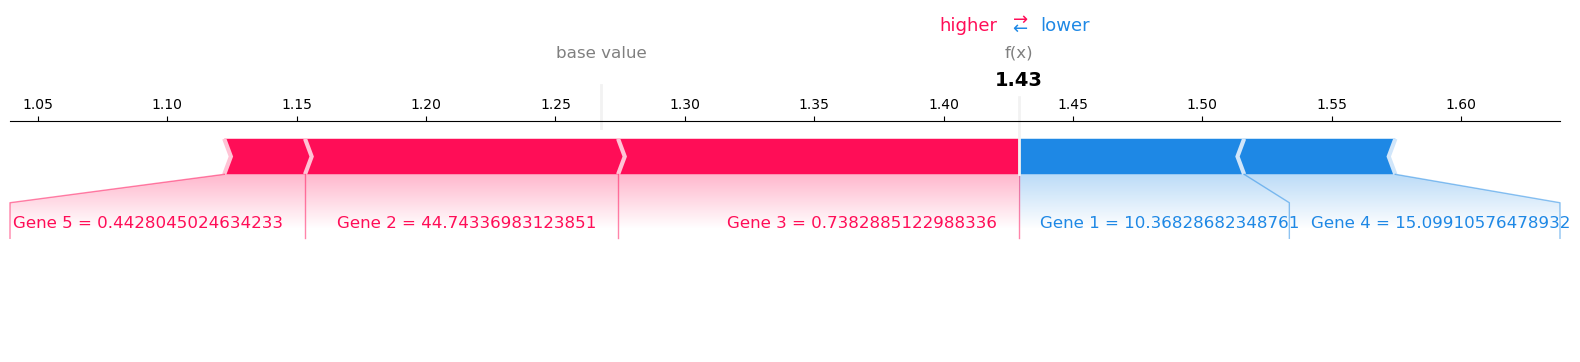

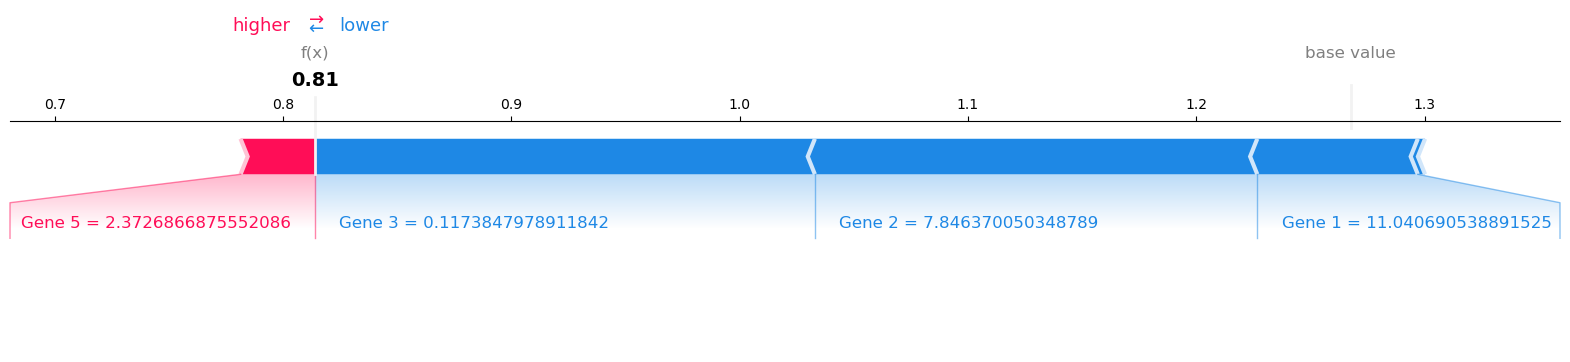

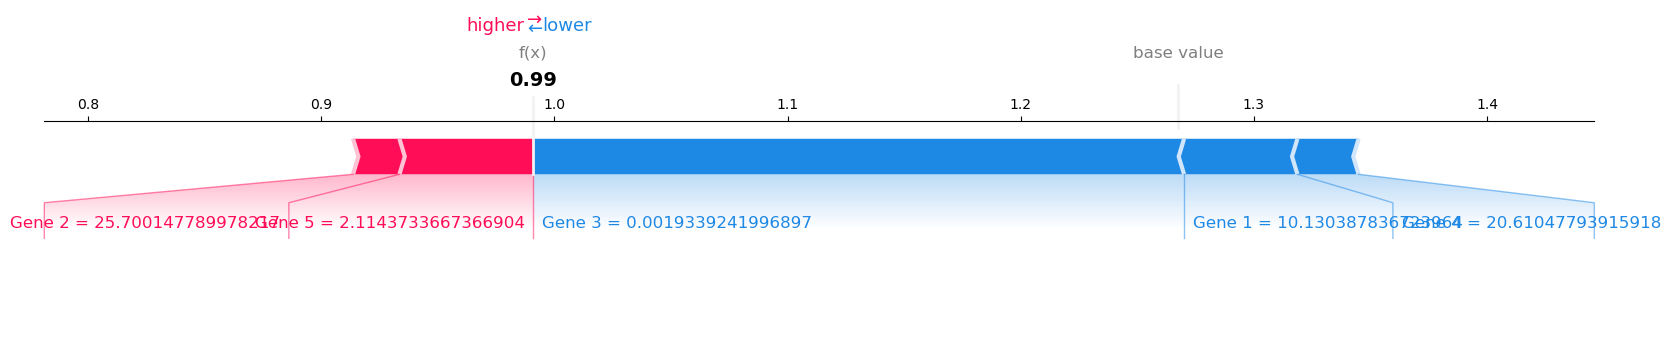

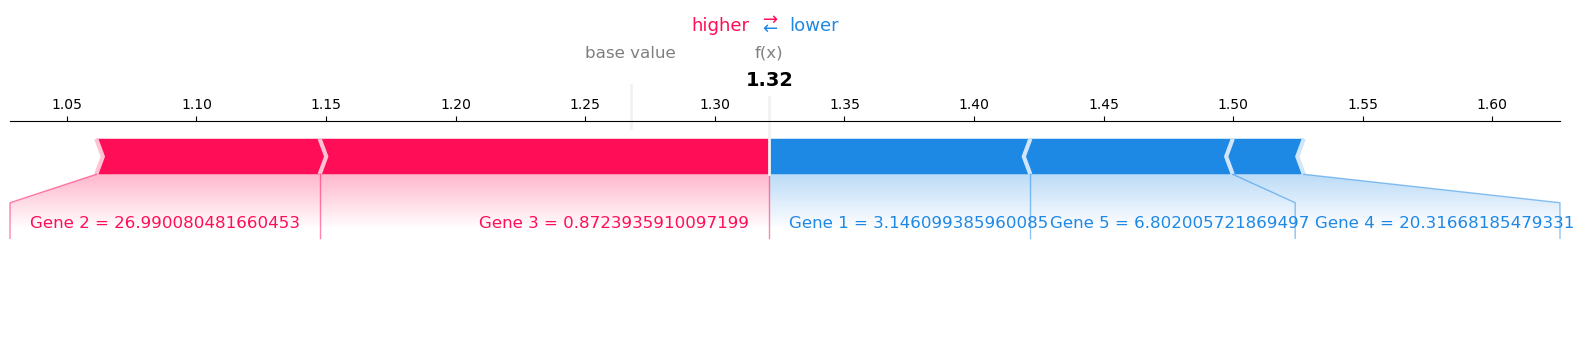

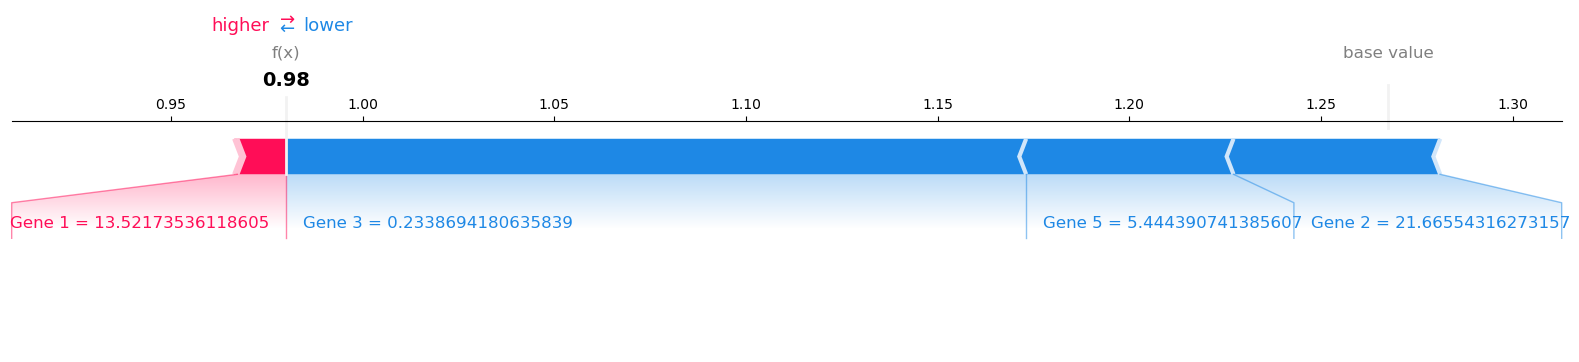

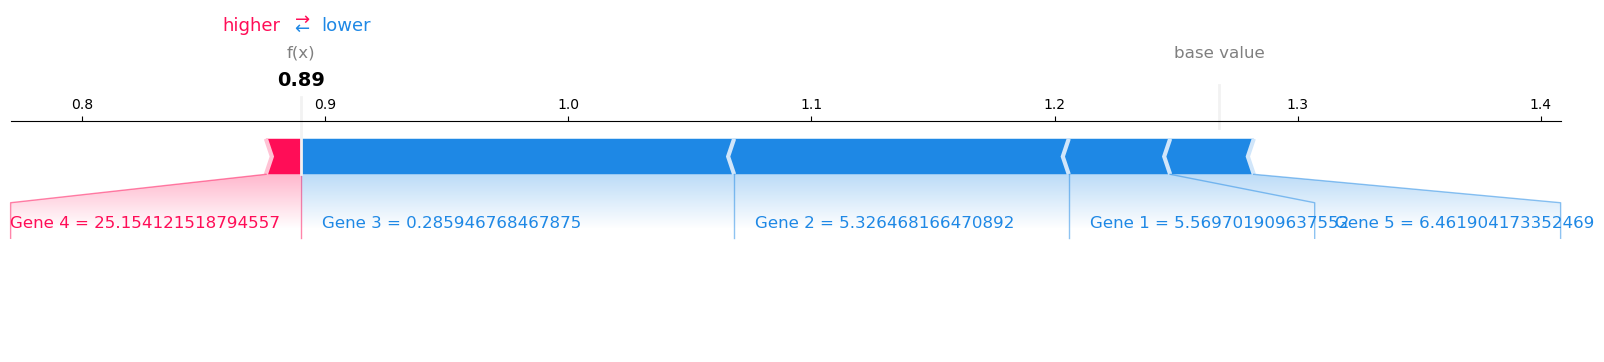

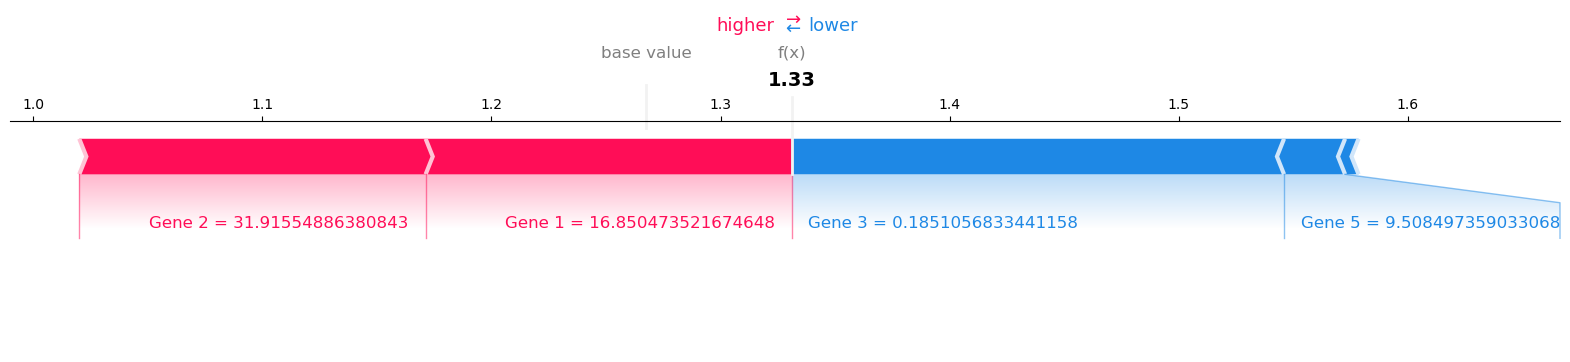

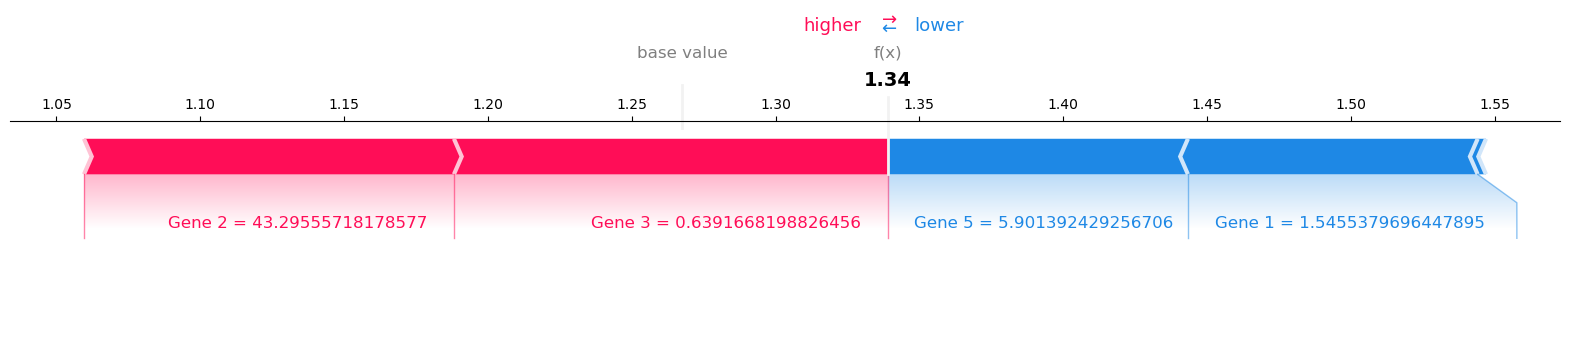

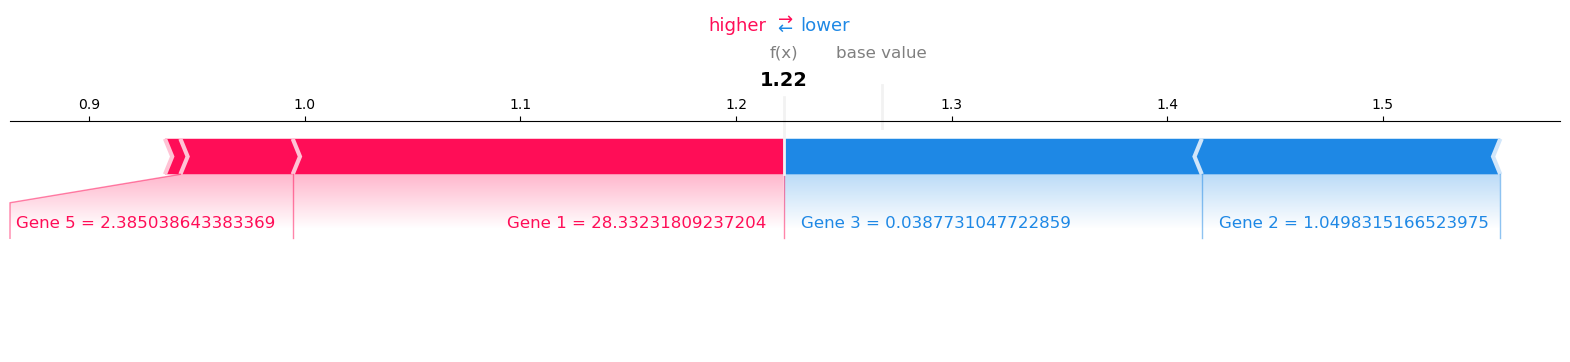

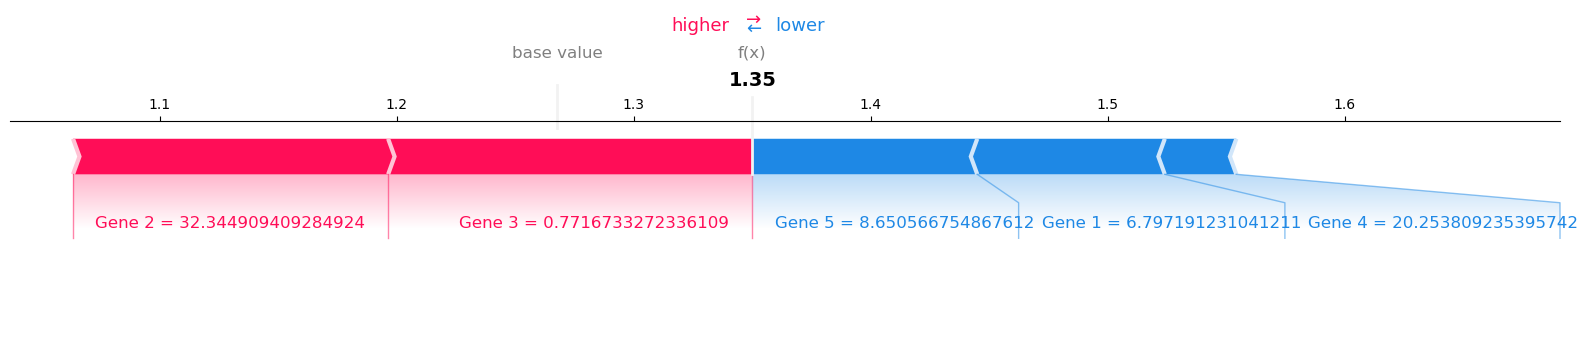

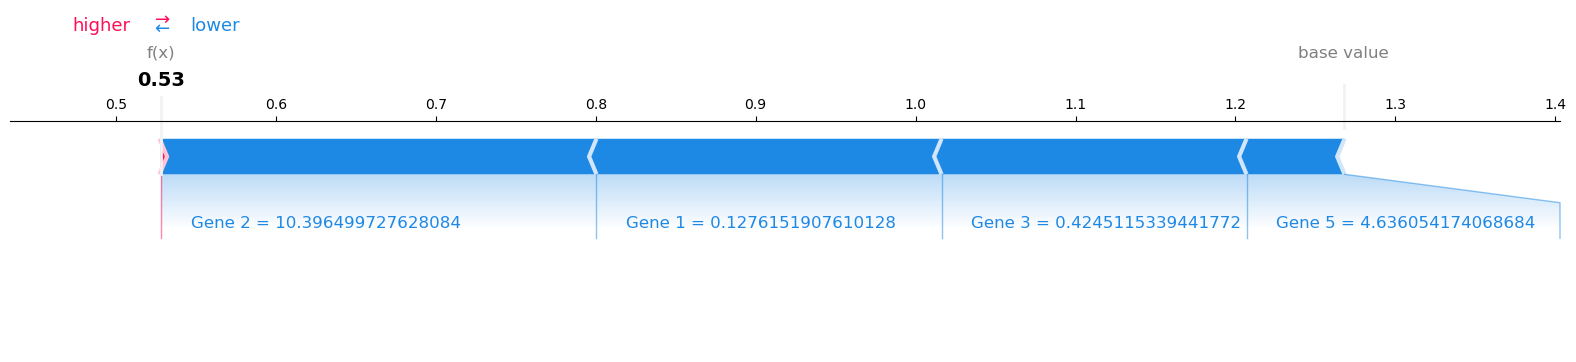

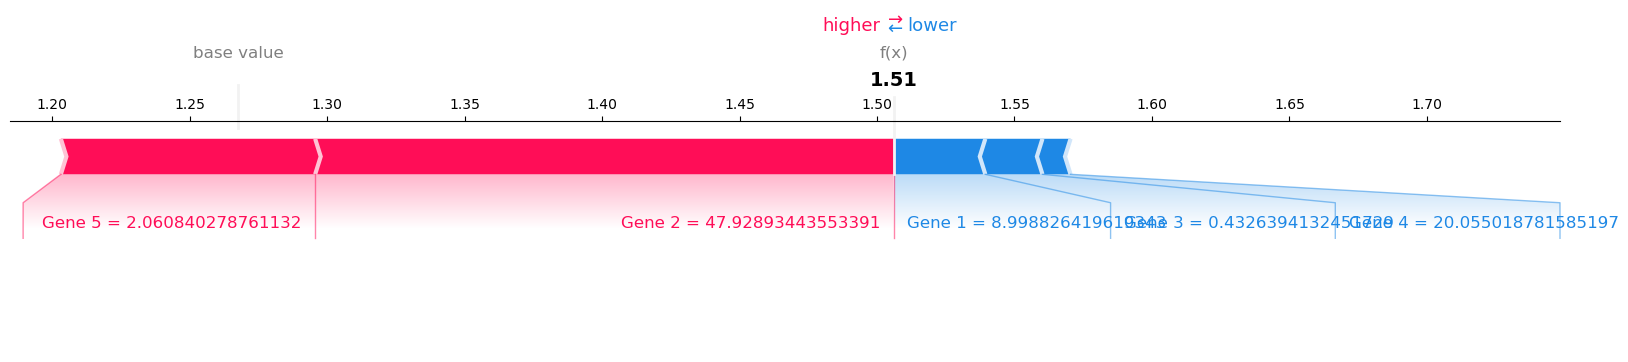

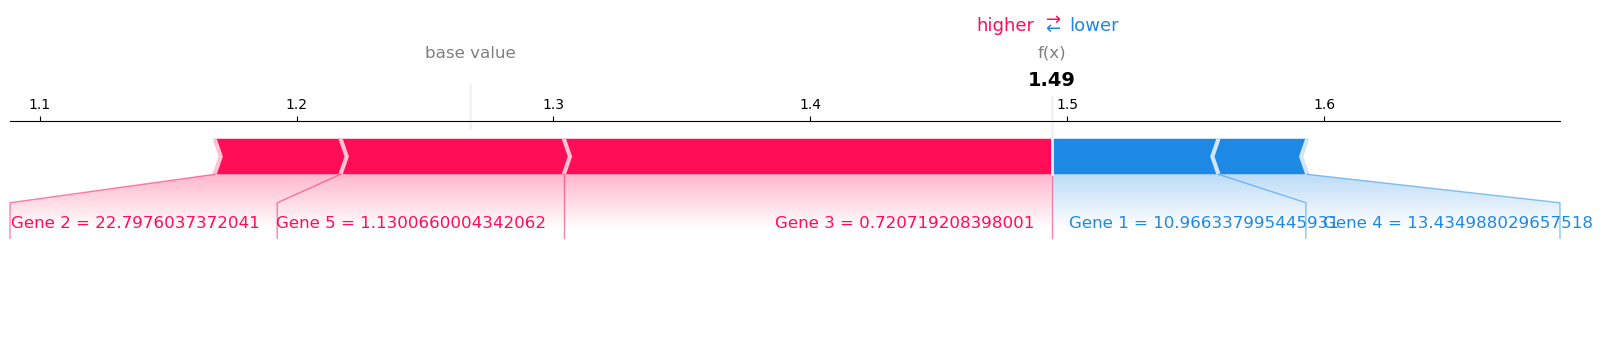

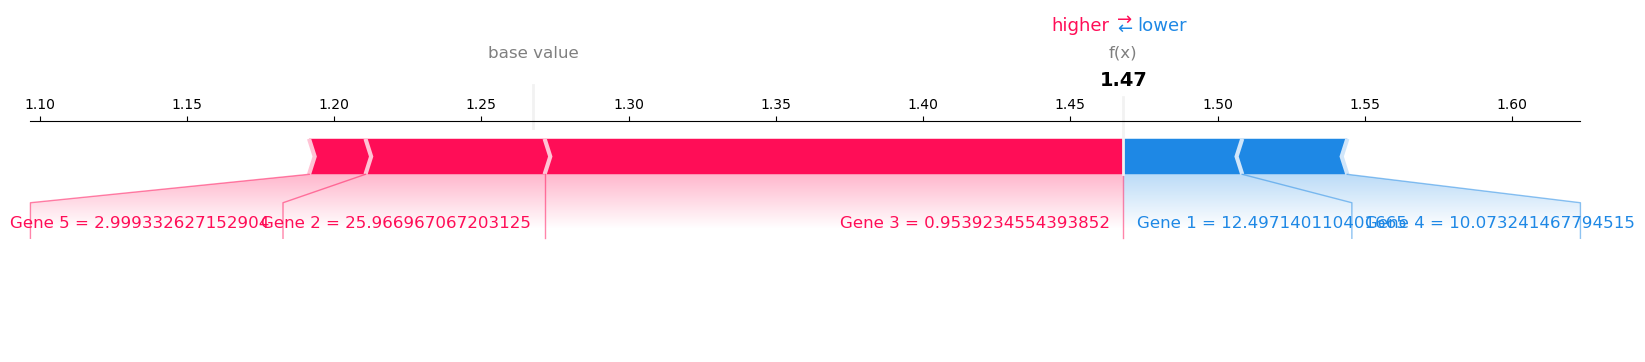

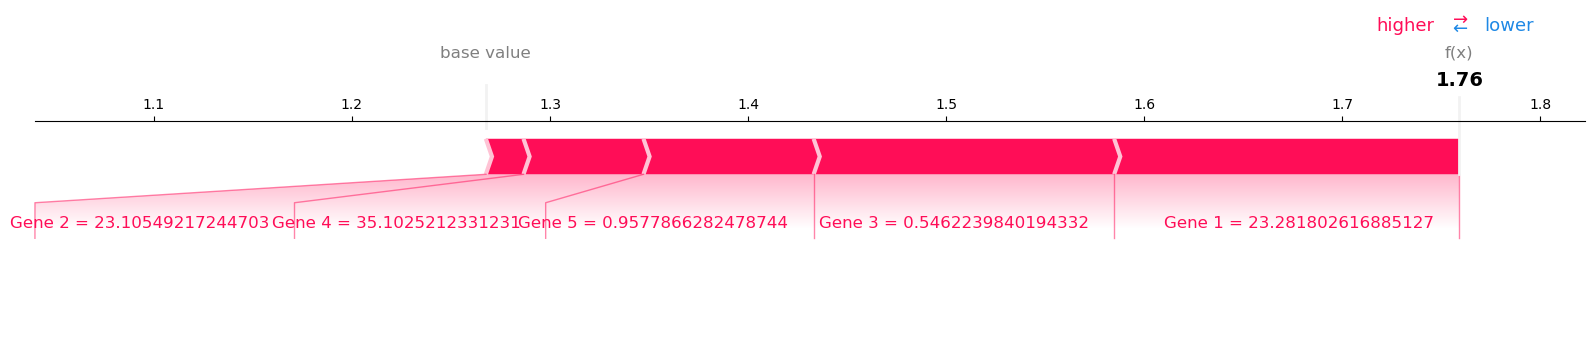

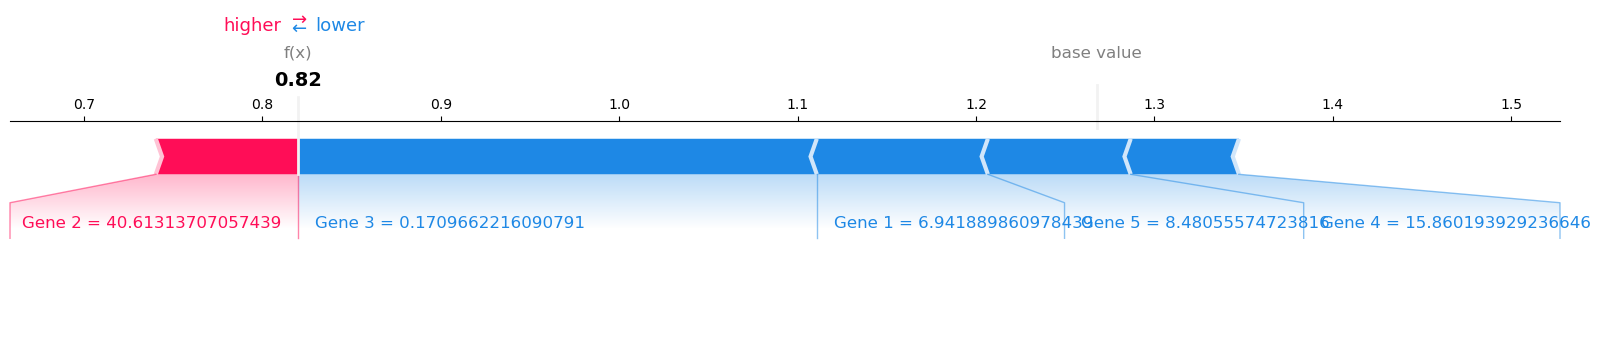

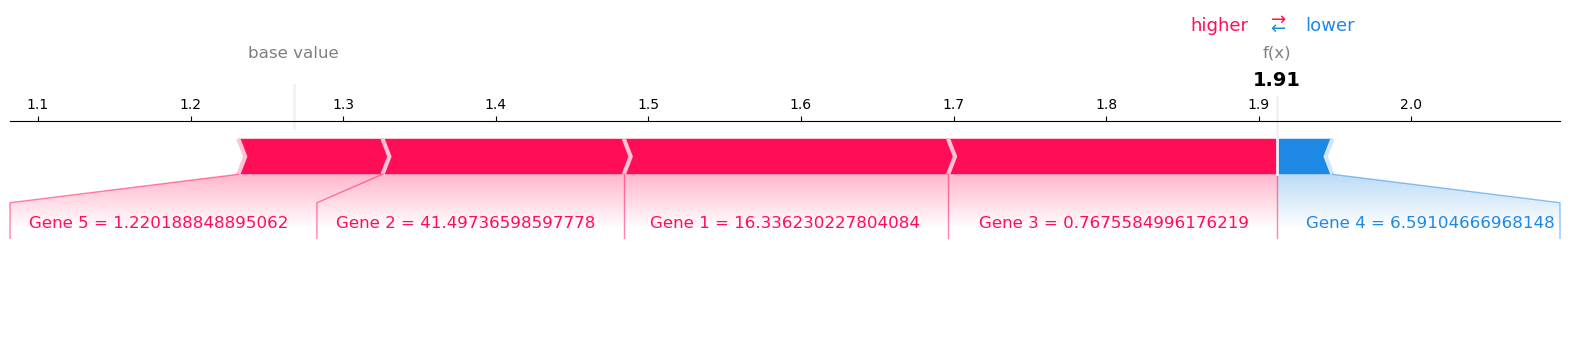

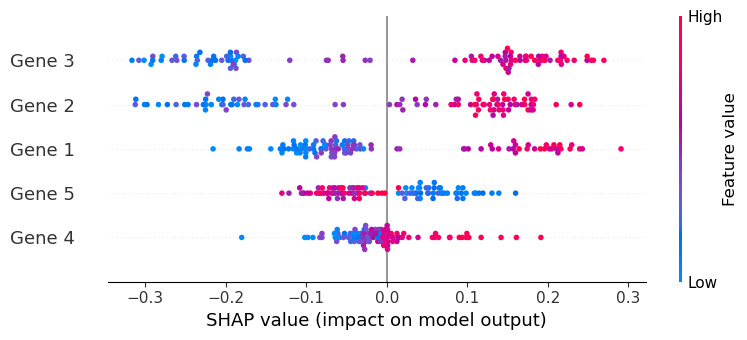

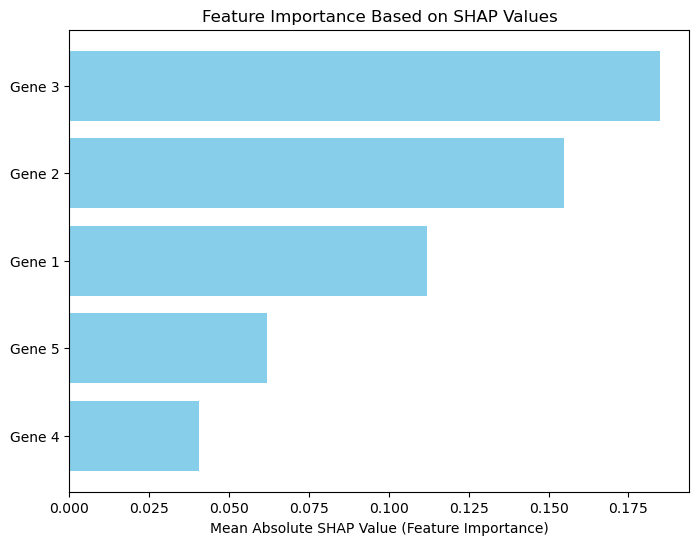

In [19]:
shap.initjs()
# Generate SHAP force plots for all rows
for instance_index in range(x.shape[0]):
    # Generate the force plot for the current instance
    shap.force_plot(
        explainer.expected_value,       # Base value (expected value)
        shap_values[instance_index],    # SHAP values for the selected instance
        x.iloc[instance_index],         # Feature values for the selected instance
        matplotlib=True                 # Use matplotlib for inline plots
    )
    # Display the plot
    plt.show()

# SHAP Summary Plot
shap.summary_plot(shap_values, x)

# Feature Importance Plot
# Calculate the mean absolute SHAP values for each feature
feature_importance = np.abs(shap_values).mean(axis=0)

# Create a DataFrame to hold feature names and importance values
feature_importance_df = pd.DataFrame({
    "Feature": x.columns,
    "Importance": feature_importance
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot the feature importance bar plot
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Mean Absolute SHAP Value (Feature Importance)")
plt.title("Feature Importance Based on SHAP Values")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [20]:
import seaborn as sns

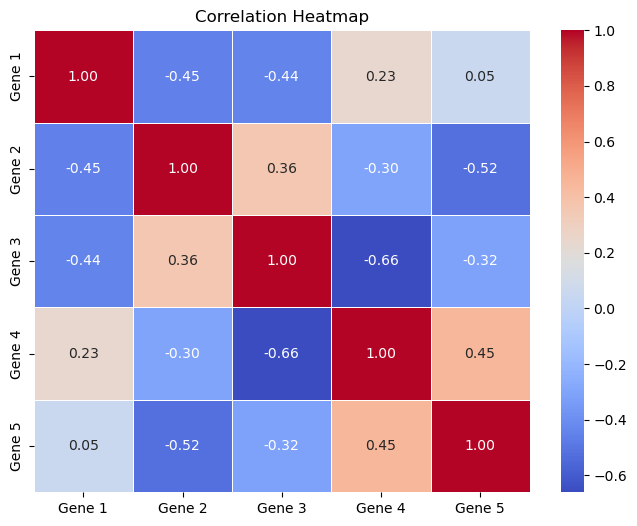

In [21]:
np.random.seed(42)
df = pd.DataFrame(np.random.rand(10, 5), columns=["Gene 1", "Gene 2", "Gene 3", "Gene 4", "Gene 5"])

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

In [25]:
import joblib
joblib.dump(model,"phenotypes_rf_model.joblib")

['phenotypes_rf_model.joblib']

In [27]:
streamlit_code = """
import streamlit as st
import joblib
import numpy as np
import shap
import matplotlib.pyplot as plt

# Load the trained model
model = joblib.load("phenotypes_rf_model.joblib")  # Ensure model file is in the directory

# Set up page style
st.set_page_config(page_title="Phenotype Prediction", layout="wide")
st.title("🧬 Phenotype Prediction & SHAP Analysis")

# Sidebar Input
st.sidebar.header("🔬 Enter Gene Expression Values")
gene_1 = st.sidebar.number_input("Gene 1", min_value=0.0, format="%.2f")
gene_2 = st.sidebar.number_input("Gene 2", min_value=0.0, format="%.2f")
gene_3 = st.sidebar.number_input("Gene 3", min_value=0.0, format="%.2f")
gene_4 = st.sidebar.number_input("Gene 4", min_value=0.0, format="%.2f")
gene_5 = st.sidebar.number_input("Gene 5", min_value=0.0, format="%.2f")

st.markdown("---")

# Prediction & SHAP Explanation
if st.sidebar.button("🚀 Predict Phenotype Score"):
    user_input = np.array([[gene_1, gene_2, gene_3, gene_4, gene_5]])
    phenotype_score = model.predict(user_input)[0]

    # Display predicted score
    st.success(f"### 🎯 Predicted Phenotype Score: *{phenotype_score:.4f}*")

    # Interpretation
    threshold = 1.5  # Adjust based on model behavior
    if phenotype_score > threshold:
        st.warning("⚠ *High Phenotypic Expression Detected!* These genes may indicate notable variation.")
    else:
        st.success("✅ *Normal Phenotype Expression Detected!* No significant genetic concerns.")

    # SHAP explanation
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(user_input)

    # SHAP Force Plot
    st.subheader("📊 SHAP Force Plot for Given Gene Inputs")

    fig, ax = plt.subplots(figsize=(10, 3))
    force_plot = shap.force_plot(
        explainer.expected_value,
        shap_values[0],
        user_input[0],
        matplotlib=True,
        show=False
    )

    plt.savefig("force_plot.png", bbox_inches="tight", dpi=300)
    st.image("force_plot.png")

    # Analyze Force Plot colors (Red = positive influence, Blue = negative influence)
    if np.any(shap_values[0] > 0):  # If red areas exist (positive SHAP values)
        st.error("🔴 *Genes significantly influence the phenotype!* Red zones indicate *strong contributors.*")
    elif np.any(shap_values[0] < 0):  # If blue areas exist (negative SHAP values)
        st.success("🔵 *Some genes reduce phenotype variation!* Blue zones indicate *stabilizing effects.*")

st.sidebar.success("✅ Adjust values and click 'Predict' to analyze phenotype expression.")
"""

# Save this code as a Python file
with open("phenotype_prediction_app.py", "w", encoding="utf-8") as file:
    file.write(streamlit_code)

print(" Streamlit app saved as 'phenotype_prediction_app.py'")


 Streamlit app saved as 'phenotype_prediction_app.py'


In [ ]:
!streamlit run phenotype_prediction_app.py